# Shear tests

In [1]:
"""
I use this notebook to perform few tests on the shear catalog and on Mass Maps. 
For all the shear tests I bin shear quantities into healpix maps of nside = 1024.
This introduces an effective smoothing scale of 3.4 arcmins. 


--> LOAD QUANTITIES:
    - Load reserved stars
    - Load matched residual catalog

    *IF* maps haven't been created yet, 
        - Load mastercat + match to metcal + additional mask filtering

TESTS:
--> MEAN RESPONSE
    - Mean response. Compute the mean response (+ errors) of a given tomogrphic bin.
    
--> MAP MAKING:
    - compute mass maps and create the healpix maps of all the relevant quantities.
    
--> MEAN RESPONSE
    - Mean response. Compute the mean response (+ errors) of a given tomogrphic bin.

--> CORRELATIONS SYSTEMTIC MAPS VS MEAN E1,E2,KE,KB


--> ALPHA,BETA,ETA FROM FOCAL PLANE AVERAGED PSF ELL., PSF ELL RESIDUALS, PSF SIZE


--> IMPACT OF CORRELATIONS OF SYSTEMATIC MAPS ON COSMIC SHEAR.

"""

from routines import *
import numpy as np
# ******************************************************************
#                              INPUT
# ******************************************************************
nside = 1024

#redshift bins
z_min_arr = np.array([0.2,0.2,0.43,0.63,0.9]) 
z_max_arr = np.array([1.3,0.43,0.63,0.9,1.3])  

z_column = 'bpz_mean'

#output folder!
name_folder_x = '/global/cscratch1/sd/mgatti/Cosmic_shear/shape_systematics/output_MM_full_v8'


done
done
done
done


# Load reserved stars

/global/homes/m/mgatti/.conda/envs/myenv/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


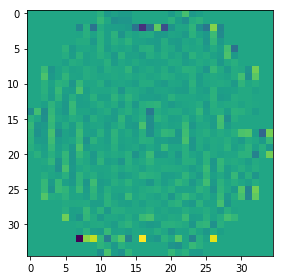

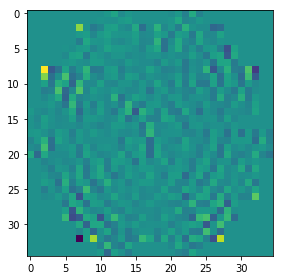

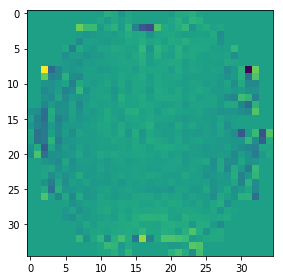

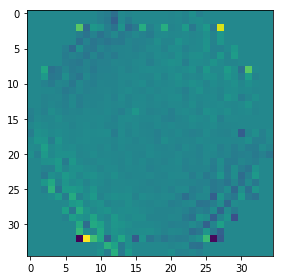

done


In [2]:
%matplotlib inline
# Load reserved stars and make grids
path_qq = "/global/homes/m/mjarvis/desdata/users/mjarvis/y3a1-v29/psf_y3a1-v29.fits"
output = "/global/cscratch1/sd/mgatti/Cosmic_shear/shape_systematics/"





prova =  field_methods()
fact = 0.05703422

mute11 = pf.open(path_qq)
dd_qq = mute11[1].data

min_x = 0. 
max_x = 0.
min_y = 0.
max_y = 0.
for i in range(62):
    min_x = (min([min((prova.ccd_corners()/fact)[i][:,0]),min_x]))
    max_x = (max([max((prova.ccd_corners()/fact)[i][:,0]),max_x]))
    min_y = (min([min((prova.ccd_corners()/fact)[i][:,1]),min_y]))
    max_y = (max([max((prova.ccd_corners()/fact)[i][:,1]),max_y]))
    

p1  = mute11[1].data['piff_e1']
p2  = mute11[1].data['piff_e2']
q1  = mute11[1].data['obs_e1']-mute11[1].data['piff_e1']
q2  = mute11[1].data['obs_e2']-mute11[1].data['piff_e2']
t1  = mute11[1].data['piff_e1']*((mute11[1].data['obs_T ']-mute11[1].data['piff_T'])/mute11[1].data['obs_T'])
t2  = mute11[1].data['piff_e2']*((mute11[1].data['obs_T ']-mute11[1].data['piff_T'])/mute11[1].data['obs_T'])
size = mute11[1].data['piff_T']
e1_o = mute11[1].data['obs_e1']
e2_o = mute11[1].data['obs_e2']
e1_m = mute11[1].data['piff_e1']
e2_m = mute11[1].data['piff_e2']

grid_res = 35
gridded_p1 = np.zeros((grid_res,grid_res))
gridded_p2 = np.zeros((grid_res,grid_res))
gridded_q1 = np.zeros((grid_res,grid_res))
gridded_q2 = np.zeros((grid_res,grid_res))
gridded_t1 = np.zeros((grid_res,grid_res))
gridded_t2 = np.zeros((grid_res,grid_res))

dx = (max_x-min_x)/grid_res
dy = (max_y-min_y)/grid_res


if not os.path.exists(output+"p2_rs_{0}.pkl".format(grid_res)):
    for i in range(grid_res):
        mask1 = (dd_qq['fov_x']>(dx*i+min_x)) & (dd_qq['fov_x']<(dx*(i+1)+min_x))
        for j in range(grid_res):
            mask = mask1 & (dd_qq['fov_y']>(dy*j+min_y)) & (dd_qq['fov_y']<(dy*(j+1)+min_y))
            if len(dd_qq['fov_y'][mask])>0:
                gridded_q1[i,j] = np.mean(q1[mask])
                gridded_q2[i,j] = np.mean(q2[mask])
                gridded_t1[i,j] = np.mean(t1[mask])
                gridded_t2[i,j] = np.mean(t2[mask]) 
                gridded_p1[i,j] = np.mean(p1[mask])
                gridded_p2[i,j] = np.mean(p2[mask])

    save_obj(output+"q1_rs_{0}".format(grid_res),gridded_q1)
    save_obj(output+"q2_rs_{0}".format(grid_res),gridded_q2)
    save_obj(output+"t1_rs_{0}".format(grid_res),gridded_t1)
    save_obj(output+"t2_rs_{0}".format(grid_res),gridded_t2)
    save_obj(output+"p1_rs_{0}".format(grid_res),gridded_p1)
    save_obj(output+"p2_rs_{0}".format(grid_res),gridded_p2)
else:
    gridded_q1 = load_obj(output+"q1_rs_{0}".format(grid_res))#,gridded_q1)
    gridded_q2 = load_obj(output+"q2_rs_{0}".format(grid_res))#,gridded_q2)
    gridded_t1 = load_obj(output+"t1_rs_{0}".format(grid_res))#,gridded_t1)
    gridded_t2 = load_obj(output+"t2_rs_{0}".format(grid_res))#,gridded_t2
    gridded_p1 = load_obj(output+"p1_rs_{0}".format(grid_res))#,gridded_t1)
    gridded_p2 = load_obj(output+"p2_rs_{0}".format(grid_res))#,gridded_t2

import matplotlib.pyplot as plt
plt.imshow(gridded_q1)
plt.show()
plt.imshow(gridded_q2)
plt.show()
plt.imshow(gridded_t1)
plt.show()
plt.imshow(gridded_t2)
plt.show()
    

pix = convert_to_pix_coord(mute11[1].data['ra'], mute11[1].data['dec'], nside=nside)
unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)
ns_map = np.zeros(hp.nside2npix(nside))
t1s_map = np.zeros(hp.nside2npix(nside))
t2s_map = np.zeros(hp.nside2npix(nside))
p1s_map = np.zeros(hp.nside2npix(nside))
p2s_map = np.zeros(hp.nside2npix(nside))

q1s_map = np.zeros(hp.nside2npix(nside))
q2s_map = np.zeros(hp.nside2npix(nside))
size_map = np.zeros(hp.nside2npix(nside))
e1o_map = np.zeros(hp.nside2npix(nside))
e2o_map = np.zeros(hp.nside2npix(nside))
ns_map[unique_pix] += np.bincount(idx_rep, weights=np.ones(len(pix)))

p1s_map[unique_pix] += np.bincount(idx_rep, weights= (mute11[1].data['piff_e1']))
p2s_map[unique_pix] += np.bincount(idx_rep, weights= (mute11[1].data['piff_e2']))

q1s_map[unique_pix] += np.bincount(idx_rep, weights= (mute11[1].data['obs_e1']-mute11[1].data['piff_e1']))
q2s_map[unique_pix] += np.bincount(idx_rep, weights= (mute11[1].data['obs_e2']-mute11[1].data['piff_e2']))
t1s_map[unique_pix] += np.bincount(idx_rep, weights= mute11[1].data['piff_e1']*(-mute11[1].data['piff_T  ' ]+mute11[1].data['obs_T'])/mute11[1].data['obs_T'])
t2s_map[unique_pix] += np.bincount(idx_rep, weights= mute11[1].data['piff_e2']*(-mute11[1].data['piff_T  ' ]+mute11[1].data['obs_T'])/mute11[1].data['obs_T'])
size_map[unique_pix] += np.bincount(idx_rep, weights= (mute11[1].data['piff_T  ' ]))
e1o_map[unique_pix] += np.bincount(idx_rep, weights= (mute11[1].data['obs_e1']))
e2o_map[unique_pix] += np.bincount(idx_rep, weights= (mute11[1].data['obs_e2']))


masks = ns_map !=0.
size_map[masks] = size_map[masks]/ns_map[masks]
q1s_map[masks] = q1s_map[masks]/ns_map[masks]
q2s_map[masks] = q2s_map[masks]/ns_map[masks]
t1s_map[masks] = t1s_map[masks]/ns_map[masks]
t2s_map[masks] = t2s_map[masks]/ns_map[masks]

print "done"


# Load matched residual catalog

In [ ]:
"""
This assigns residuals to every galaxy exposures based on their position in focal plane coordinates.
Then, It averages over exposure and creates a catalog to be matched later with the mastercat.


"""
# multiprocessing to do the matching faster.
agents = 60

# Metacl files from Erin.
path_mcal  = "/global/cscratch1/sd/mgatti/Cosmic_shear/metacal/*"
#path to the output
path_matched_catalog = "/global/cscratch1/sd/mgatti/Cosmic_shear/shape_systematics/qt_to_metacal1.csv"




#https://www.cosmo.bnl.gov/Private/gpfs/workarea/desdata/wlpipe/y3v02-mcal-003/output/

from multiprocessing import Pool,sharedctypes
from functools import partial
from contextlib import closing
import pyfits as pf
import numpy
import pandas as pd

import timeit
start = timeit.default_timer()

import glob
files = (glob.glob(path_mcal))




def runit(i):
    try:
        cc = []
        oo = []
        mute = pf.open(files[i])
        selection = (mute[1].data['mcal_s2n_r']>10.) &(mute[1].data['mcal_s2n_r']<100.) & (mute[1].data['flags']==0) & (mute[1].data['mcal_T']/mute[1].data['mcal_Tpsf']>0.5)

        #match entries
        mask = np.in1d(mute[2].data['id'],mute[1].data['id'][selection])

        #conversion to pixel coordinates
        chip = [np.int(xx.split("_")[2].split("c")[1])-1 for xx in mute[2].data['image_id'][mask]]
        exposure = [np.int(xx.split("_")[0].split("D00")[1]) for xx in mute[2].data['image_id'][mask]]


        fact = 0.05703422
        x1,y1 = prova.ccd_to_field(chip,mute[2].data['orig_col' ][mask ],mute[2].data['orig_row'][mask])
        y1/=fact
        x1/=fact
        ind1,ind2 = np.array((x1-min_x)/dx).astype(int),np.array((y1-min_y)/dy).astype(int)
        q1 = np.array([gridded_q1[ind1[ixx],ind2[ixx]] for ixx in range(len(ind1))])
        q2 = np.array([gridded_q2[ind1[ixx],ind2[ixx]] for ixx in range(len(ind1))])
        t1 = np.array([gridded_t1[ind1[ixx],ind2[ixx]] for ixx in range(len(ind1))])
        t2 = np.array([gridded_t2[ind1[ixx],ind2[ixx]] for ixx in range(len(ind1))])
        p1 = np.array([gridded_p1[ind1[ixx],ind2[ixx]] for ixx in range(len(ind1))])
        p2 = np.array([gridded_p2[ind1[ixx],ind2[ixx]] for ixx in range(len(ind1))])
        mask_outchip = q1 !=0.
        dd =  {'x1':np.array(x1[mask_outchip]),'y1':np.array(y1[mask_outchip]),
               'q1':np.array(q1[mask_outchip]),'q2':np.array(q2[mask_outchip]),
               'p1':np.array(p1[mask_outchip]),'p2':np.array(p2[mask_outchip]),
               't1':np.array(t1[mask_outchip]),'t2':np.array(t2[mask_outchip]),'exp':np.array(exposure)[mask_outchip]}
        c1 = pd.DataFrame(data =dd,index = np.array(mute[2].data['id'][mask][mask_outchip]))
        c1_compressed = c1.groupby(c1.index).mean()

        dd = {'e1':np.array(mute[1].data['mcal_g  '][selection,0]).byteswap().newbyteorder()
              ,'e2':np.array(mute[1].data['mcal_g  '][selection,1]).byteswap().newbyteorder()}
        orig1 = pd.DataFrame(data =dd, index = np.array(mute[1].data['id'][selection]))

        to_join_mastercat = orig1.join(c1_compressed)
        cosmichshearfov_cat = orig1.join(c1)
        cosmichshearfov_cat =cosmichshearfov_cat.drop(['p1','p2','q1','q2','t1','t2'], axis=1)
        cc.append(cosmichshearfov_cat)
        oo.append(to_join_mastercat)
        #return  _,oo,len(oo[0])
        return  _,oo,len(oo[0])
    except:
        print files[i]

if not os.path.exists(path_matched_catalog):
    run_done = []
    numero = range((len(files)))
    with closing(Pool(processes=agents)) as pool:
        run_done.append(pool.map(partial(runit),numero))
        #mm = (pool.map(partial(runit),numero))
        #cc1.append(mm[0])
        #oo1.append(mm[1])


    s = []
    for i in range(len(files)):
        try:
            s.append(run_done[0][i][1][0])
        except:
            pass#
    ccf = pd.concat(s)

    ccf.to_csv(path_matched_catalog )
else:
    ccf=pd.read_csv(path_matched_catalog )
print ("done")


In [ ]:
#https://www.cosmo.bnl.gov/Private/gpfs/workarea/desdata/wlpipe/y3v02-mcal-003/output/
"""
[OPTIONAL !!! NO NEED TO BE RUN HERE!!! ]
This makes a full catalog with shears in focal plane coordinates (with all the Y3 exposures)

"""
from multiprocessing import Pool,sharedctypes
from functools import partial
from contextlib import closing
agents = 60
import pyfits as pf
import numpy
import pandas as pd

import timeit
start = timeit.default_timer()

import glob
files = (glob.glob("../metacal/*"))




def runit(i):
    try:
        cc = []
        oo = []
        mute = pf.open(files[i])
        selection = (mute[1].data['mcal_s2n_r']>10.) &(mute[1].data['mcal_s2n_r']<100.) & (mute[1].data['flags']==0) & (mute[1].data['mcal_T']/mute[1].data['mcal_Tpsf']>0.5)

        #match entries
        mask = np.in1d(mute[2].data['id'],mute[1].data['id'][selection])

        #conversion to pixel coordinates
        chip = [np.int(xx.split("_")[2].split("c")[1])-1 for xx in mute[2].data['image_id'][mask]]
        exposure = [np.int(xx.split("_")[0].split("D00")[1]) for xx in mute[2].data['image_id'][mask]]


        fact = 0.05703422
        x1,y1 = prova.ccd_to_field(chip,mute[2].data['orig_col' ][mask ],mute[2].data['orig_row'][mask])
        y1/=fact
        x1/=fact
        ind1,ind2 = np.array((x1-min_x)/dx).astype(int),np.array((y1-min_y)/dy).astype(int)
        q1 = np.array([gridded_q1[ind1[ixx],ind2[ixx]] for ixx in range(len(ind1))])
        q2 = np.array([gridded_q2[ind1[ixx],ind2[ixx]] for ixx in range(len(ind1))])
        t1 = np.array([gridded_t1[ind1[ixx],ind2[ixx]] for ixx in range(len(ind1))])
        t2 = np.array([gridded_t2[ind1[ixx],ind2[ixx]] for ixx in range(len(ind1))])

        #mask_outchip = q1 !=0.
        dd =  {'x1':np.array(x1),'y1':np.array(y1),
               'q1':np.array(q1),'q2':np.array(q2),
               't1':np.array(t1),'t2':np.array(t2),'exp':np.array(exposure)}
        c1 = pd.DataFrame(data =dd,index = np.array(mute[2].data['id'][mask]))
        c1_compressed = c1.groupby(c1.index).mean()

        dd = {'e1':np.array(mute[1].data['mcal_g  '][selection,0]).byteswap().newbyteorder(),
              #'e1_1p':np.array(mute[1].data['mcal_g_1p'][selection,0]).byteswap().newbyteorder(),
              #'e1_2p':np.array(mute[1].data['mcal_g_2p'][selection,0]).byteswap().newbyteorder(),
              #'e1_1m':np.array(mute[1].data['mcal_g_1m'][selection,0]).byteswap().newbyteorder(),
              #'e1_2m':np.array(mute[1].data['mcal_g_2m'][selection,0]).byteswap().newbyteorder(),
              
              'e2':np.array(mute[1].data['mcal_g  '][selection,1]).byteswap().newbyteorder(),
              #'e1_1p':np.array(mute[1].data['mcal_g_1p'][selection,1]).byteswap().newbyteorder(),
              #'e1_2p':np.array(mute[1].data['mcal_g_2p'][selection,1]).byteswap().newbyteorder(),
              #'e1_1m':np.array(mute[1].data['mcal_g_1m'][selection,1]).byteswap().newbyteorder(),
              #'e1_2m':np.array(mute[1].data['mcal_g_2m'][selection,1]).byteswap().newbyteorder()}
              'idx':np.array(mute[1].data['id'][selection].byteswap().newbyteorder())}
        orig1 = pd.DataFrame(data =dd, index = np.array(mute[1].data['id'][selection]))

        to_join_mastercat = orig1.join(c1_compressed)
        cosmichshearfov_cat = orig1.join(c1)
        cosmichshearfov_cat =cosmichshearfov_cat.drop(['q1','q2','t1','t2'], axis=1)
        cc.append(cosmichshearfov_cat)
        oo.append(to_join_mastercat)
        #return  _,oo,len(oo[0])
        return  cc,_,len(cc[0])
    except:
        print files[i]



import os
chunks = 50
import glob

if not os.path.exists("../shear_fov_pos/"):
    os.mkdir("../shear_fov_pos/")
    
files = (glob.glob("../metacal/*"))
re = np.int(len(files)/chunks)


for i in range(1,chunks+1):
#for i in range(1):
    print i
    run_done = []
    numero = range(i*re,(i+1)*re)

    qqf = 0.
    joined = 0.
    dd = 0.
    mastercat  = 0.
    mmmd = 0.
    mmmask =0.
    
    with closing(Pool(processes=agents)) as pool:
        run_done.append(pool.map(partial(runit),numero))
    print "hg"

    s = []
    for kk in range(len(files)):
        try:
            s.append(run_done[0][kk][0][0])
        except:
            pass#
    qqf = pd.concat(s)

    dd ={'bpz_mean':sample_dict['bpz_mean'].byteswap().newbyteorder(),'bpz_zmc':sample_dict['bpz_zmc'].byteswap().newbyteorder(),
        'snr':sample_dict['snr'][0].byteswap().newbyteorder(),
         #'snr_1':sample_dict['snr'][1],
         #'snr_2':sample_dict['snr'][2],
         #'snr_3':sample_dict['snr'][3],
         #'snr_4':sample_dict['snr'][4],
        'size_ratio':sample_dict['size_ratio'][0].byteswap().newbyteorder(),
        #'size_ratio_1':sample_dict['size_ratio'][1],
        #'size_ratio_2':sample_dict['size_ratio'][2],
        #'size_ratio_3':sample_dict['size_ratio'][3],
        #'size_ratio_4':sample_dict['size_ratio'][4],
        # 'e1':sample_dict['e1'][0].byteswap().newbyteorder(),
        # 'e2':sample_dict['e2'][0].byteswap().newbyteorder(),
        'flags':sample_dict['flags'].byteswap().newbyteorder()}

    mastercat = pd.DataFrame(data =dd, index = sample_dict['idx'].byteswap().newbyteorder())
    joined = qqf.join(mastercat,lsuffix ='_s')
    mmmask = joined['e1']**2>0.
    mmd = joined[mmmask]
    mmd.to_csv('../shear_fov_pos/shear_fov_pos_{0}.csv'.format(i))



# Load mastercat

In [ ]:
'''
 Load data. Input files defined in yaml files (destest_bpz.yaml, destest_metacal.yaml,destest_gold.yaml)
 It requires destest : 
 https://github.com/des-science/destest
 
 catalogs (to be specified in the yaml files):
 
 Latest version '/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18.h5'
 Latest subsampled version (for quick tests): '/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18_subsampled.h5'
 
 I didn't manage to run the destest Calibrator. This means that if you directly load R1 and R2 from the catalog,
 they are only the respones of the sample and neglect the response of the selection (which is usually few %).
 The solution I got was to load the columns without selection (uncut=True)
 and apply the response and selection by myself.
'''

import numpy as np
import destest
import yaml
param_file = './destest_metacal.yaml'
params_mcal = yaml.load(open(param_file))
source_mcal = destest.H5Source(params_mcal)
selector_mcal = destest.Selector(params_mcal,source_mcal)#, return_calibrator=destest.MetaCalib)
#calibrator_mcal =  destest.MetaCalib(params_mcal,selector_mcal)

param_file = './destest_bpz.yaml'
params_bpz = yaml.load(open(param_file))
source_bpz = destest.H5Source(params_bpz)
selector_bpz = destest.Selector(params_bpz,source_bpz,inherit=selector_mcal)

param_file = './destest_gold.yaml'
params_gold = yaml.load(open(param_file))
source_gold = destest.H5Source(params_gold)
selector_gold  = destest.Selector(params_gold,source_gold,inherit=selector_mcal)

ebv = selector_gold.get_col('ebv_sfd98',uncut=True)
color = selector_gold.get_col('sof_cm_mag_corrected_r',uncut=True)[0]-selector_gold.get_col('sof_cm_mag_corrected_i',uncut=True)[0]


e_1 = selector_mcal.get_col('e_1',uncut=True)
e_2 = selector_mcal.get_col('e_2',uncut=True)
R1 = selector_mcal.get_col('R11',uncut=True)
R2 = selector_mcal.get_col('R22',uncut=True)

psf_e1 = selector_mcal.get_col('psf_e1',uncut=True)
psf_e2 = selector_mcal.get_col('psf_e2',uncut=True)

psf_size = selector_mcal.get_col('psf_T',uncut=True)
size_ratio = selector_mcal.get_col('size_ratio',uncut=True)
snr = selector_mcal.get_col('snr',uncut=True)
#bpz_mean = selector_bpz.get_col('bpz_zmean_sof')
#bpz_zmc = selector_bpz.get_col('bpz_zmc_sof')


ra = selector_gold.get_col('ra',uncut=True)
dec = selector_gold.get_col('dec',uncut=True)
flags_f = np.array(selector_mcal.get_col('flags',uncut=True))
bpz_zmc =selector_bpz.get_col('zmc_sof',uncut=True)
bpz_mean =selector_bpz.get_col('zmean_sof',uncut=True)
idx = selector_mcal.get_col('coadd_object_id',uncut=True)


import h5py
mute = h5py.File("/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18.h5","r")
mute['regions']['catalog']['gold'][u'region']
mute['catalog']['gold']['coadd_object_id']

jj_reg = np.array(mute['regions']['catalog']['gold'][u'region'])
id_gold = np.array(mute['catalog']['gold']['coadd_object_id'])

mask_id = np.in1d(id_gold,idx[0])
len(idx[0])
id_gold_match = id_gold[mask_id]
jj_reg_match = jj_reg[mask_id]

sample_dict = dict()
sample_dict.update({'jk' : jj_reg_match })
sample_dict.update({'idx' : idx[0]})
sample_dict.update({'ebv' : ebv[0]})
sample_dict.update({'color' : color})
sample_dict.update({'bpz_mean' : bpz_mean[0]})
sample_dict.update({'bpz_zmc' : bpz_zmc[0]})
sample_dict.update({'R1' : R1[0]})
sample_dict.update({'R2' : R2[0]})
sample_dict.update({'e1' : e_1})
sample_dict.update({'e2' : e_2})
sample_dict.update({'psf_e1' : psf_e1[0]})
sample_dict.update({'psf_e2' : psf_e2[0]})
sample_dict.update({'snr' : snr})
sample_dict.update({'flags' : flags_f[0]})
sample_dict.update({'psf_size' : psf_size[0]})
sample_dict.update({'size_ratio' : size_ratio})
#sample_dict.update({'bpz_mean' : bpz_mean[0]})
#sample_dict.update({'bpz_zmc' : bpz_zmc[0]})
sample_dict.update({'ra' : ra[0]})
sample_dict.update({'dec' : dec[0]})

print ('done')





# match to metcal

In [13]:
import pandas as pd
ccf1 = ccf.set_index("Unnamed: 0")
dd ={'e1x':sample_dict['e1'][0]}
mastercat = pd.DataFrame(data =dd, index = sample_dict['idx'])
joined = mastercat.join(ccf1)
sample_dict.update({'p1' : joined['p1']})
sample_dict.update({'p2' : joined['p2']})
sample_dict.update({'q1' : joined['q1']})
sample_dict.update({'q2' : joined['q2']})
sample_dict.update({'t1' : joined['t1']})
sample_dict.update({'t2' : joined['t2']})
print ("done")

done


# Additional mask filtering

In [16]:
'''
This applies badregions mask + bugged tiles and checks that all the other masks are correctly
applied. A bit slow to load all the files. (Need to be performed once.)

where to find the masks:
badregions and badtiles:  https://cdcvs.fnal.gov/redmine/projects/des-y3/wiki/Y3A2_Gold_bad_regions
foreground: https://cdcvs.fnal.gov/redmine/projects/des-y3/wiki/Y3A2_Gold_foreground_regions
footprint: https://cdcvs.fnal.gov/redmine/projects/des-y3/wiki/Y3A2_Gold_footprint

'''


import pyfits as pf
import healpy as hp
nside_masks = 4096
from astropy.table import Table

import os
def convert_to_pix_coord(ra, dec, nside=1024):
    """
    Converts RA,DEC to hpix coordinates
    """

    theta = (90.0 - dec) * np.pi / 180.
    phi = ra * np.pi / 180.
    pix = hp.ang2pix(nside, theta, phi, nest=False)

    return pix

pathx = '/global/cscratch1/sd/mgatti/Cosmic_shear/shape_systematics/obs__maps_new.fits'
if not os.path.exists(pathx):
  
    labels =[]
    obs_maps = []


    badregion = pf.open('/global/cscratch1/sd/mgatti/Input_files/masks/y3a2_badregions_mask_v2.0.fits')
    footprint = pf.open('/global/cscratch1/sd/mgatti/Input_files/masks/y3a2_footprint_griz_1exp_v2.0.fits')
    foreground = pf.open('/global/cscratch1/sd/mgatti/Input_files/masks/y3a2_foreground_mask_v2.1.fits')
    fuckedtiles = pf.open('/global/cscratch1/sd/mgatti/Input_files/masks/y3v02+a_mof001_badtiles_nside4096_nest.fits')


    mask_footprint = hp.pixelfunc.reorder(((footprint[1].data['I'])).reshape(201326592), n2r = True)
    mask_badregion = hp.pixelfunc.reorder(((badregion[1].data['I'])).reshape(201326592), n2r = True)
    fuckedtiles_pixels = (fuckedtiles[1].data['PIXEL'])
    fuckedtiles_I = ((fuckedtiles[1].data['I']))
    mask_fuckedtiles = np.zeros(hp.nside2npix(nside_masks))
    mask_fuckedtiles[fuckedtiles_pixels] = fuckedtiles_I
    mask_fuckedtiles_ring = hp.pixelfunc.reorder(mask_fuckedtiles, n2r = True)
    
    labels.append('mask_footprint')
    obs_maps.append(mask_footprint)
    labels.append('mask_badregion')
    obs_maps.append(mask_badregion)
    labels.append('mask_fuckedtiles_ring')
    obs_maps.append(mask_fuckedtiles_ring)
    
    

    mask_fore_nested = hp.pixelfunc.reorder((foreground[1].data['I']).reshape(201326592), n2r = True)


    label = '_fm_stars'
    fm_stars = mask_fore_nested == 64
    labels.append(label)
    obs_maps.append(fm_stars)

    label = '_gb_cl'
    gb_cl = mask_fore_nested == 32
    labels.append(label)
    obs_maps.append(gb_cl)

    label = '_bright_st'
    bright_st = mask_fore_nested==16
    labels.append(label)
    obs_maps.append(bright_st)

    label = '_Near_lmc'
    Near_lmc = mask_fore_nested ==8
    labels.append(label)
    obs_maps.append(Near_lmc)

    label = '_tmass_bright_st'
    tmass_bright_st = mask_fore_nested ==4
    labels.append(label)
    obs_maps.append(tmass_bright_st)

    label = '_LNG'
    LNG = mask_fore_nested ==2
    labels.append(label)
    obs_maps.append(LNG)

    label = '_tmass_faint_st'
    tmass_faint_st = mask_fore_nested ==1
    labels.append(label)
    obs_maps.append(tmass_faint_st)
    

    fits_f = Table()
    for ii,key in enumerate(labels):
        fits_f[key] = obs_maps[ii]
    fits_f.write(pathx)
else:

    mute = pf.open(pathx)
    mute = mute[1].data
   
    gb_cl = mute['_gb_cl']
    bright_st = mute['_bright_st']
    Near_lmc = mute['_Near_lmc']
    tmass_bright_st = mute['_tmass_bright_st']
    LNG = mute['_LNG']
    fm_stars = mute['_fm_stars']
    tmass_faint_st = mute['_tmass_faint_st']
    mask_badregion = mute['mask_badregion']
    mask_fuckedtiles_ring = mute['mask_fuckedtiles_ring']
    mask_footprint = mute['mask_footprint']
    

mute_range = np.array(range(hp.nside2npix(nside_masks)))
pix_hr = convert_to_pix_coord(np.array(ra[0]), np.array(dec[0]), nside=nside_masks)

print 'total number of galaxies: {0}'.format(len(pix_hr))

mask_fuckedtiles_pix_ring = np.in1d(pix_hr,mute_range[mask_fuckedtiles_ring==1])
print 'galaxies in bugged tiles: {0}'.format(len(pix_hr[mask_fuckedtiles_pix_ring]))

mask_badregions_pix = np.in1d(pix_hr,mute_range[mask_badregion>=1])
print 'galaxies in badregions >= 1 (badregion+bugged tiles): {0}'.format(len(pix_hr[mask_badregions_pix ]))


mask_footprint_pix = np.in1d(pix_hr,mute_range[mask_footprint!=1])
print 'galaxies not in footprint: {0}'.format(len(pix_hr[mask_footprint_pix]))

mask_fm_stars_pix = np.in1d(pix_hr,mute_range[fm_stars])
print 'galaxies in famouse star regions: {0}'.format(len(pix_hr[mask_fm_stars_pix]))

mask_gb_cl_pix = np.in1d(pix_hr,mute_range[gb_cl])
print 'galaxies in glob cluster regions: {0}'.format(len(pix_hr[mask_gb_cl_pix]))

mask_bright_st_pix = np.in1d(pix_hr,mute_range[bright_st])
print 'galaxies in bright stars regions: {0}'.format(len(pix_hr[mask_bright_st_pix]))

mask_Near_lmc_pix = np.in1d(pix_hr,mute_range[Near_lmc])
print 'galaxies near_lmc : {0}'.format(len(pix_hr[mask_Near_lmc_pix]))

mask_tmass_bright_st_pix = np.in1d(pix_hr,mute_range[tmass_bright_st])
print 'galaxies tmass bright stars regions : {0}'.format(len(pix_hr[mask_tmass_bright_st_pix]))

mask_LNG_pix = np.in1d(pix_hr,mute_range[LNG])
print 'galaxies LNG regions : {0}'.format(len(pix_hr[mask_LNG_pix]))

mask_tmass_faint_st_pix = np.in1d(pix_hr,mute_range[tmass_faint_st])
print 'galaxies tmass faint stars regions : {0}'.format(len(pix_hr[mask_tmass_faint_st_pix]))

mask_total = mask_fuckedtiles_pix_ring | mask_badregions_pix | mask_footprint_pix | mask_fm_stars_pix | mask_tmass_faint_st_pix | mask_LNG_pix | mask_tmass_bright_st_pix | mask_Near_lmc_pix | mask_bright_st_pix | mask_gb_cl_pix
mask_total = ~ mask_total

print ('done')



def apply_mask(block,mask):
    for key in block.keys():
        try:

            block[key]
            block[key] = block[key][:,mask]
        except:
            try:
               
                for il in range(len(block[key])):

                    block[key][il] = block[key][il][mask]
            except:
      
                block[key] = block[key][mask]
 
apply_mask(sample_dict,mask_total) 
print 'done'

total number of galaxies: 96624194
galaxies in bugged tiles: 0
galaxies in badregions >= 1 (badregion+bugged tiles): 0
galaxies not in footprint: 0
galaxies in famouse star regions: 0
galaxies in glob cluster regions: 0
galaxies in bright stars regions: 0
galaxies near_lmc : 0
galaxies tmass bright stars regions : 0
galaxies LNG regions : 0
galaxies tmass faint stars regions : 0
done
done


# Mean response

In [ ]:
"""
* OPTIONAL * 
Compute mean response (with jackknife errors) for different tomographic bins. 
"""



# redshift & bad pixel mask **********************************************
#shrink a bit the size of the data
zmask = (sample_dict[z_column] > min(z_min_arr )) & (sample_dict[z_column] < max(z_max_arr))
apply_mask(sample_dict,zmask)

# rotate shapes (noise estimation) *******************
std_tot = np.sqrt((sample_dict['e1'][0]**2 + sample_dict['e2'][0]**2))
angle = np.random.uniform(low=0.0, high=2*np.pi,size=len(sample_dict['e1'][0]))
std_1 = std_tot*np.cos(2*angle)
std_2 = std_tot*np.cos(2*angle)

sample_dict['e1_rndm'] = std_1
sample_dict['e2_rndm'] = std_2
        
# prepare for response
g1p=sample_dict['e1'][1]
g2p=sample_dict['e2'][3]
g1m=sample_dict['e1'][2]
g2m=sample_dict['e2'][4]
g1=sample_dict['e1'][0]
g2=sample_dict['e2'][0]
ra = sample_dict['ra']
dec = sample_dict['dec']

print 'done'

def compute_selection_chunk(block):
    '''
    Compute selection for Metacalibration for a given chunk
    '''

    select = np.zeros(len(block['snr'][0]))

    selection_mask_1p = (block['snr'][1] > 10.) & (block['snr'][1] < 100.) & ((block['size_ratio'][1] ) > 0.5) &((block['flags'] ) == 0)
    selection_mask_1m = (block['snr'][2] > 10.) & (block['snr'][2] < 100.) & ((block['size_ratio'][2]) > 0.5)&((block['flags'] ) == 0)
    selection_mask_2p = (block['snr'][3] > 10.) & (block['snr'][3] < 100.) & ((block['size_ratio'][3]) > 0.5)&((block['flags'] ) == 0)
    selection_mask_2m = (block['snr'][4] > 10.) & (block['snr'][4] < 100.) &  ((block['size_ratio'][4]) > 0.5)&((block['flags'] )== 0)
    selection_mask = (block['snr'][0] > 10.) & (block['snr'][0] < 100.) &  ((block['size_ratio'][0]) > 0.5)&((block['flags']) == 0)

    select += 32
    select[selection_mask_1p] += 1
    select[selection_mask_1m] += 2
    select[selection_mask_2p] += 4
    select[selection_mask_2m] += 8
    select[selection_mask] += 16

    return select, selection_mask

    
R_dict = dict()

for ii,z_min in enumerate(z_min_arr):
 if ii>0:
    z_max = z_max_arr[ii]
    print " Bin: ",z_min,z_max
    name_foder =name_folder_x+'_{0}_{1}/'.format(z_min,z_max)

    if 1==1:

        
        # define selection masks *******************************************************
        selection, selection_mask = compute_selection_chunk(sample_dict)

        # tomobins selection *****************************************************
        selection_z = np.zeros(len(sample_dict['e1'][0]))

        selection_z += 4
        select_bin_1 = (sample_dict[z_column] > z_min) & (sample_dict[z_column] < z_max)
        selection_z[select_bin_1] += 1


        mask_1_bin = np.array([str(bin(int(selection_z[i]))[4]) == '1' for i in range(len(selection))])
        #mask_2_bin = np.array([str(bin(int(selection_z[i]))[3]) == '1' for i in range(len(selection))])
        mask_1p = np.array([str(bin(int(selection[i]))[7]) == '1' for i in range(len(selection))])
        mask_1m = np.array([str(bin(int(selection[i]))[6]) == '1' for i in range(len(selection))])
        mask_2p = np.array([str(bin(int(selection[i]))[5]) == '1' for i in range(len(selection))])
        mask_2m = np.array([str(bin(int(selection[i]))[4]) == '1' for i in range(len(selection))])
        mask = np.array([str(bin(int(selection[i]))[3]) == '1' for i in range(len(selection))])
    
        
        # compute response **********************

        
        dgamma = 2. * 0.01
        R11_1 = (np.mean(g1p[mask & mask_1_bin]) - np.mean(g1m[mask & mask_1_bin]) + np.mean(
        g1[mask_1p & mask_1_bin]) - np.mean(
        g1[mask_1m & mask_1_bin])) / dgamma
        R22_1 = (np.mean(g2p[mask & mask_1_bin]) - np.mean(g2m[mask & mask_1_bin]) + np.mean(
        g2[mask_2p & mask_1_bin]) - np.mean(
        g2[mask_2m & mask_1_bin])) / dgamma
        
        
        
        R1_a = np.sum(g1p[mask & mask_1_bin])#/dgamma
        R1_b = np.sum(g1m[mask & mask_1_bin])#/dgamma 
        R1_c = np.sum(g1[mask_1p & mask_1_bin])#/dgamma
        R1_d = np.sum(g1[mask_1m & mask_1_bin])#/dgamma
        len1a = len(g1p[mask & mask_1_bin])
        len1b = len(g1m[mask & mask_1_bin])
        len1c = len(g1[mask_1p & mask_1_bin])
        len1d = len(g1[mask_1m & mask_1_bin])
        
        R2_a = np.sum(g2p[mask & mask_1_bin])#/dgamma
        R2_b = np.sum(g2m[mask & mask_1_bin])#/dgamma
        R2_c = np.sum(g2[mask_2p & mask_1_bin])#/dgamma
        R2_d = np.sum(g2[mask_2m & mask_1_bin])#/dgamma
        
        len2a = len(g2p[mask & mask_1_bin])
        len2b = len(g2m[mask & mask_1_bin])
        len2c = len(g2[mask_2p & mask_1_bin])
        len2d = len(g2[mask_2m & mask_1_bin])
        
        R11_1_jck = np.zeros(1000)
        R22_1_jck = np.zeros(1000)

        mute_dict = dict()
        for jk in range(1000):
            print (jk)
            mask_jk = sample_dict['jk'] == jk

            
            R11_1_jck[jk] = ((R1_a-np.sum(g1p[mask & mask_1_bin & mask_jk]))/(len1a-len(g1p[mask & mask_1_bin & mask_jk]))
                            -(R1_b - np.sum(g1m[mask & mask_1_bin& mask_jk]))/(len1b-len(g1m[mask & mask_1_bin& mask_jk]))
                             +(R1_c - np.sum(g1[mask_1p & mask_1_bin& mask_jk]))/(len1c-len(g1[mask_1p & mask_1_bin& mask_jk]))
                             -(R1_d - np.sum(g1[mask_1m & mask_1_bin& mask_jk]))/(len1d-len(g1[mask_1m & mask_1_bin& mask_jk])))/dgamma
            
            R22_1_jck[jk] = ((R2_a-np.sum(g2p[mask & mask_1_bin & mask_jk]))/(len2a-len(g2p[mask & mask_1_bin & mask_jk]))
                            -(R2_b - np.sum(g2m[mask & mask_1_bin& mask_jk]))/(len2b-len(g2m[mask & mask_1_bin& mask_jk]))
                             +(R2_c - np.sum(g2[mask_2p & mask_1_bin& mask_jk]))/(len2c-len(g2[mask_2p & mask_1_bin& mask_jk]))
                             -(R2_d - np.sum(g2[mask_2m & mask_1_bin& mask_jk]))/(len2d-len(g2[mask_2m & mask_1_bin& mask_jk])))/dgamma
                 

            
            
            
        mute_dict['R11'] = R11_1
        mute_dict['R11_jck'] = R11_1_jck
        mute_dict['R22'] = R22_1
        mute_dict['R22_jck'] = R22_1_jck   
        R_dict['{0}_{1}'.format(z_min,z_max)] = mute_dict
        
        
for i,z_min in enumerate(z_min_arr):
 if i>0:
    z_max = z_max_arr[i]
    print ""
    print '{0}_{1}'.format(z_min,z_max)
    print "R1: ",R_dict['{0}_{1}'.format(z_min,z_max)]['R11']
    print "R1 err: ",covariance_scalar_jck(R_dict['{0}_{1}'.format(z_min,z_max)]['R11_jck'],1000, type_c = 'jackknife')['err']
    print '{0}_{1}'.format(z_min,z_max)
    print "R2: ",R_dict['{0}_{1}'.format(z_min,z_max)]['R22']
    print "R2 err: ",covariance_scalar_jck(R_dict['{0}_{1}'.format(z_min,z_max)]['R22_jck'],1000, type_c = 'jackknife')['err']
    
    

# Map making

In [3]:



%matplotlib inline
import matplotlib.pyplot as plt
import healpy as hp
import os
import numpy as np
import pickle


# ******************************************************************

def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)#, encoding='latin1')




#*********************************************************
 


def compute_selection_chunk(block):
    '''
    Compute selection for Metacalibration for a given chunk
    '''

    select = np.zeros(len(block['snr'][0]))

    selection_mask_1p = (block['snr'][1] > 10.) & (block['snr'][1] < 100.) & ((block['size_ratio'][1] ) > 0.5) &((block['flags'] ) == 0)
    selection_mask_1m = (block['snr'][2] > 10.) & (block['snr'][2] < 100.) & ((block['size_ratio'][2]) > 0.5)&((block['flags'] ) == 0)
    selection_mask_2p = (block['snr'][3] > 10.) & (block['snr'][3] < 100.) & ((block['size_ratio'][3]) > 0.5)&((block['flags'] ) == 0)
    selection_mask_2m = (block['snr'][4] > 10.) & (block['snr'][4] < 100.) &  ((block['size_ratio'][4]) > 0.5)&((block['flags'] )== 0)
    selection_mask = (block['snr'][0] > 10.) & (block['snr'][0] < 100.) &  ((block['size_ratio'][0]) > 0.5)&((block['flags']) == 0)

    select += 32
    select[selection_mask_1p] += 1
    select[selection_mask_1m] += 2
    select[selection_mask_2p] += 4
    select[selection_mask_2m] += 8
    select[selection_mask] += 16

    return select, selection_mask

first = False
    
dict_tot = dict()
for ii,z_min in enumerate(z_min_arr):
    z_max = z_max_arr[ii]
    print " Bin: ",z_min,z_max
    name_foder =name_folder_x+'_{0}_{1}/'.format(z_min,z_max)

    if not os.path.exists(name_foder):    
        os.mkdir(name_foder)


    if not os.path.exists(name_foder+'/maps.pkl'.format(z_min,z_max)):

        if not first:
            # redshift & bad pixel mask **********************************************
            #shrink a bit the size of the data
            zmask = (sample_dict[z_column] > min(z_min_arr )) & (sample_dict[z_column] < max(z_max_arr))
            apply_mask(sample_dict,zmask)

            # rotate shapes (noise estimation) *******************
            std_tot = np.sqrt((sample_dict['e1'][0]**2 + sample_dict['e2'][0]**2)/2.)
            std_1 = np.random.normal(loc=0.0, scale=std_tot, size=int(len(sample_dict['e1'][0])))
            std_2 = np.random.normal(loc=0.0, scale=std_tot, size=int(len(sample_dict['e1'][0])))
            std_1 = std_tot1/np.sqrt(n_tot)
            std_2 = std_tot2/np.sqrt(n_tot)
       

            
            sample_dict['e1_rndm'] = std_1
            sample_dict['e2_rndm'] = std_2

            # prepare for response
            g1p=sample_dict['e1'][1]
            g2p=sample_dict['e2'][3]
            g1m=sample_dict['e1'][2]
            g2m=sample_dict['e2'][4]
            g1=sample_dict['e1'][0]
            g2=sample_dict['e2'][0]
            ra = sample_dict['ra']
            dec = sample_dict['dec']
            first = True
        
        # define selection masks *******************************************************
        selection, selection_mask = compute_selection_chunk(sample_dict)

        # tomobins selection *****************************************************
        selection_z = np.zeros(len(sample_dict['e1'][0]))

        selection_z += 4
        select_bin_1 = (sample_dict[z_column] > z_min) & (sample_dict[z_column] < z_max)
        selection_z[select_bin_1] += 1


        mask_1_bin = np.array([str(bin(int(selection_z[i]))[4]) == '1' for i in range(len(selection))])
        #mask_2_bin = np.array([str(bin(int(selection_z[i]))[3]) == '1' for i in range(len(selection))])
        mask_1p = np.array([str(bin(int(selection[i]))[7]) == '1' for i in range(len(selection))])
        mask_1m = np.array([str(bin(int(selection[i]))[6]) == '1' for i in range(len(selection))])
        mask_2p = np.array([str(bin(int(selection[i]))[5]) == '1' for i in range(len(selection))])
        mask_2m = np.array([str(bin(int(selection[i]))[4]) == '1' for i in range(len(selection))])
        mask = np.array([str(bin(int(selection[i]))[3]) == '1' for i in range(len(selection))])
    
        
        # compute response **********************

        
        dgamma = 2. * 0.01
        R11_1 = (np.mean(g1p[mask & mask_1_bin]) - np.mean(g1m[mask & mask_1_bin]) + np.mean(
        g1[mask_1p & mask_1_bin]) - np.mean(
        g1[mask_1m & mask_1_bin])) / dgamma
        R22_1 = (np.mean(g2p[mask & mask_1_bin]) - np.mean(g2m[mask & mask_1_bin]) + np.mean(
        g2[mask_2p & mask_1_bin]) - np.mean(
        g2[mask_2m & mask_1_bin])) / dgamma

        #R11_2 = (np.mean(g1p[mask & mask_2_bin]) - np.mean(g1m[mask & mask_2_bin]) + np.mean(
        #g1[mask_1p & mask_2_bin]) - np.mean(
        #g1[mask_1m & mask_2_bin])) / dgamma
        #R22_2 = (np.mean(g2p[mask & mask_2_bin]) - np.mean(g2m[mask & mask_2_bin]) + np.mean(
        #g2[mask_2p & mask_2_bin]) - np.mean(
        #g2[mask_2m & mask_2_bin])) / dgamma


        normale_response = dict()
        normale_response.update({'R11_1':R11_1})
        normale_response.update({'R22_1':R22_1})
        print "Metacal response  R11_1: {0:2.3f}   R22_1: {1:2.3f}".format(R11_1,R22_1)
        #save_obj('./output_MM_v2_{0}_{1}/normal_response'.format(z_min,z_max),normale_response)
    
        # compute noise *****************************
        std_tot_bin = np.sqrt((np.std(sample_dict['e1'][0][mask & mask_1_bin]/R11_1)**2 + np.std(sample_dict['e2'][0][mask & mask_1_bin]/R22_1)**2))
        std_e1_bin = np.sqrt(np.std(sample_dict['e1'][0][mask & mask_1_bin]/R11_1)**2)
        std_e2_bin = np.sqrt(np.std(sample_dict['e2'][0][mask & mask_1_bin]/R22_1)**2)

        #initialize maps ************************
        #mask_photo_z = (sample_dict['bpz_mean'] > z_min) & (sample_dict['bpz_mean'] < z_max) & mask_total
        n_map = np.zeros(hp.nside2npix(nside))
        n_map1 = np.zeros(hp.nside2npix(nside))
        e1_map = np.zeros(hp.nside2npix(nside))
        e2_map = np.zeros(hp.nside2npix(nside))
        e1_rndm_map = np.zeros(hp.nside2npix(nside))
        e2_rndm_map = np.zeros(hp.nside2npix(nside))
        psf_e1_map = np.zeros(hp.nside2npix(nside))
        psf_e2_map = np.zeros(hp.nside2npix(nside))
        snr_map = np.zeros(hp.nside2npix(nside))
        psf_size_map = np.zeros(hp.nside2npix(nside))
        size_ratio_map = np.zeros(hp.nside2npix(nside))
        ebv_map = np.zeros(hp.nside2npix(nside))
        color_map = np.zeros(hp.nside2npix(nside))                  
        q1_map = np.zeros(hp.nside2npix(nside))
        q2_map = np.zeros(hp.nside2npix(nside))
        p1_map = np.zeros(hp.nside2npix(nside))
        p2_map = np.zeros(hp.nside2npix(nside))
        t1_map = np.zeros(hp.nside2npix(nside))
        t2_map = np.zeros(hp.nside2npix(nside))  

        bpz_zmean = np.zeros(hp.nside2npix(nside)) 
        bpz_zmc = np.zeros(hp.nside2npix(nside)) 
        # convert to map *********************************************************

        pix = convert_to_pix_coord(sample_dict['ra'][mask & mask_1_bin], sample_dict['dec'][mask & mask_1_bin], nside=nside)

        unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)
        n_map[unique_pix] += np.bincount(idx_rep, weights=np.ones(len(pix)))
        e1_map[unique_pix] += np.bincount(idx_rep, weights= sample_dict['e1'][0][mask & mask_1_bin])
        e2_map[unique_pix] += np.bincount(idx_rep, weights= sample_dict['e2'][0][mask & mask_1_bin])
        e1_rndm_map[unique_pix] += np.bincount(idx_rep, weights= sample_dict['e1_rndm'][mask & mask_1_bin])
        e2_rndm_map[unique_pix] += np.bincount(idx_rep, weights= sample_dict['e2_rndm'][mask & mask_1_bin])
 
        psf_e1_map[unique_pix] += np.bincount(idx_rep, weights = sample_dict['psf_e1'][mask & mask_1_bin])
        psf_e2_map[unique_pix] += np.bincount(idx_rep, weights = sample_dict['psf_e2'][mask & mask_1_bin])
        snr_map[unique_pix] += np.bincount(idx_rep, weights = sample_dict['snr'][0][mask & mask_1_bin])
        size_ratio_map[unique_pix] += np.bincount(idx_rep, weights = sample_dict['size_ratio'][0][mask & mask_1_bin])
        psf_size_map[unique_pix] += np.bincount(idx_rep, weights = sample_dict['psf_size'][mask & mask_1_bin])
        
        color_map[unique_pix] += np.bincount(idx_rep, weights = sample_dict['color'][mask & mask_1_bin])
        ebv_map[unique_pix] += np.bincount(idx_rep, weights = sample_dict['ebv'][mask & mask_1_bin])
            
            
        bpz_zmean[unique_pix] += np.bincount(idx_rep, weights = sample_dict['bpz_mean'][mask & mask_1_bin])
        bpz_zmc[unique_pix] += np.bincount(idx_rep, weights = sample_dict['bpz_zmc'][mask & mask_1_bin])
        
        
        
        add_mask = sample_dict['q1']**2>-0.1
        pix1 = convert_to_pix_coord(sample_dict['ra'][mask & mask_1_bin &add_mask ], sample_dict['dec'][mask & mask_1_bin &add_mask], nside=nside)

        unique_pix1, idx1, idx_rep1 = np.unique(pix1, return_index=True, return_inverse=True)
        n_map1[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix1)))
        
        q1_map[unique_pix1] += np.bincount(idx_rep1, weights = sample_dict['q1'][mask & mask_1_bin &add_mask ])
        q2_map[unique_pix1] += np.bincount(idx_rep1, weights = sample_dict['q2'][mask & mask_1_bin &add_mask])
        t1_map[unique_pix1] += np.bincount(idx_rep1, weights = sample_dict['t1'][mask & mask_1_bin &add_mask])
        t2_map[unique_pix1] += np.bincount(idx_rep1, weights = sample_dict['t2'][mask & mask_1_bin &add_mask])
        p1_map[unique_pix1] += np.bincount(idx_rep1, weights = sample_dict['p1'][mask & mask_1_bin &add_mask])
        p2_map[unique_pix1] += np.bincount(idx_rep1, weights = sample_dict['p2'][mask & mask_1_bin &add_mask])
                       


        mask_sims = n_map != 0.
        e1_map[mask_sims]  = e1_map[mask_sims]/n_map[mask_sims]
        e2_map[mask_sims] = e2_map[mask_sims] / n_map[mask_sims]
        e1_rndm_map[mask_sims]  = e1_rndm_map[mask_sims]/n_map[mask_sims]
        e2_rndm_map[mask_sims] = e2_rndm_map[mask_sims] / n_map[mask_sims]

        psf_e1_map[mask_sims] = psf_e1_map[mask_sims]/n_map[mask_sims]
        psf_e2_map[mask_sims] = psf_e2_map[mask_sims]/n_map[mask_sims]
        snr_map[mask_sims] = snr_map[mask_sims]/n_map[mask_sims]
        size_ratio_map[mask_sims] = size_ratio_map[mask_sims] /n_map[mask_sims]
        psf_size_map[mask_sims] = psf_size_map[mask_sims]/n_map[mask_sims]
        color_map[mask_sims] = color_map[mask_sims] /n_map[mask_sims]
        ebv_map[mask_sims] = ebv_map[mask_sims]/n_map[mask_sims]
        bpz_zmean[mask_sims] = bpz_zmean[mask_sims]/n_map[mask_sims]
        bpz_zmc[mask_sims] = bpz_zmc[mask_sims]/n_map[mask_sims]
    
        mask_sims = n_map1 != 0.
        q1_map[mask_sims] = q1_map[mask_sims]/n_map1[mask_sims]
        q2_map[mask_sims] = q2_map[mask_sims]/n_map1[mask_sims]
        t1_map[mask_sims] = t1_map[mask_sims]/n_map1[mask_sims]
        t2_map[mask_sims] = t2_map[mask_sims]/n_map1[mask_sims]
        p1_map[mask_sims] = p1_map[mask_sims]/n_map1[mask_sims]
        p2_map[mask_sims] = p2_map[mask_sims]/n_map1[mask_sims]

        
        plt.hist(sample_dict['bpz_zmc'][mask & mask_1_bin],bins = np.linspace(0.,2.,200),histtype='step')
        plt.savefig(name_foder+'/z_distr.png')
      
        # save maps *****************************************
        sample_map = dict()
        sample_map.update({'n' : n_map})
        sample_map.update({'e1' : e1_map})
        sample_map.update({'e2' : e2_map})
        sample_map.update({'e1_rndm' : e1_rndm_map})
        sample_map.update({'e2_rndm' : e2_rndm_map})
        sample_map.update({'std_tot':std_tot_bin})
        sample_map.update({'std_e1':std_e1_bin})
        sample_map.update({'std_e2':std_e2_bin})
        sample_map.update({'R11_1' : R11_1})
        sample_map.update({'R22_1' : R22_1})
        sample_map.update({'psf_e1' : psf_e1_map})
        sample_map.update({'psf_e2' : psf_e2_map})
        sample_map.update({'snr' : snr_map})
        sample_map.update({'psf_size' : psf_size_map})
        sample_map.update({'size_ratio' : size_ratio_map})
        sample_map.update({'color' : color_map})
        sample_map.update({'ebv' : ebv_map})  
        sample_map.update({'q1' : q1_map})   
        sample_map.update({'q2' : q2_map})   
        sample_map.update({'t1' : t1_map})   
        sample_map.update({'t2' : t2_map})   
        sample_map.update({'p1' : p1_map})   
        sample_map.update({'p2' : p2_map})
        sample_map.update({'bpz_zmean' : bpz_zmean})   
        sample_map.update({'bpz_zmc' : bpz_zmc})   
        info = dict()
        info.update({'z_min' : z_min})
        info.update({'z_max' : z_max})
        info.update({'mask_sims' : sample_map['n'] != 0.})
        sample_map.update({'info' : info})
        save_obj(name_foder+'/maps'.format(z_min,z_max),sample_map)
        dict_tot.update({'{0}_{1}'.format(z_min,z_max):sample_map})
    else:
        print "loading"
        sample_map = load_obj(name_foder+'/maps'.format(z_min,z_max))
        dict_tot.update({'{0}_{1}'.format(z_min,z_max):sample_map})

print 'done'


 Bin:  0.2 1.3
loading
 Bin:  0.2 0.43
loading
 Bin:  0.43 0.63
loading
 Bin:  0.63 0.9
loading
 Bin:  0.9 1.3
loading
done


# Define Jackknife

0.2_1.3
0.2_0.43
0.43_0.63
0.63_0.9
0.9_1.3
done


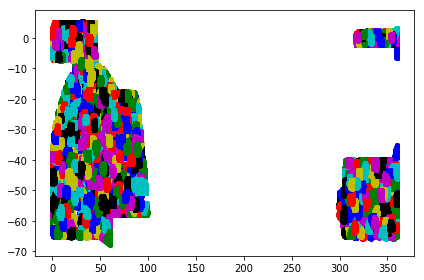

In [4]:
import kmeans_radec
import os
from scipy import spatial
from kmeans_radec import KMeans, kmeans_sample


# INPUT:   ****************************
'''
you might want to use 100 jackknife if you're using
the sumbsampled version of the catalog/
'''
n_jck = 1000 #!!!!!!


def IndexToDeclRa(index, nside,nest= False):
    theta,phi=hp.pixelfunc.pix2ang(nside ,index,nest=nest)
    return -np.degrees(theta-np.pi/2.),np.degrees(phi)

def jaccknife_regions(ra,dec,number_of_regions,label_jck = None, centers_jck = None, v = False):
    new_cat=np.array(zip(ra, dec))
    A=new_cat[np.random.randint(new_cat.shape[0],size=20000),:]
    
    if not v:
        centers_jck= kmeans_radec.kmeans_sample(A,number_of_regions,maxiter=100,tol=1e-05,verbose=0)
        np.savetxt(label_jck, centers_jck.centers)
        centers_tree = spatial.cKDTree(centers_jck.centers[:,[0,1]])
        _ , hpix= centers_tree.query(np.array(zip(ra,dec)))
        return centers_tree, hpix, centers_jck.centers[:,[0,1]]   
    
    centers_tree = spatial.cKDTree(centers_jck[:,[0,1]])
    _ , hpix= centers_tree.query(np.array(zip(ra,dec)))
    return centers_tree, hpix, centers_jck[:,[0,1]]

for ii,z_min in enumerate(z_min_arr):
    z_max = z_max_arr[ii]
    binx = '{0}_{1}'.format(z_min,z_max)
    
    
    
    print binx
    
    
    # define jackknife regions **********************
    
    area = np.array(range(hp.nside2npix(nside)))[dict_tot[binx]['info']['mask_sims']]
    dec,ra = IndexToDeclRa(area, nside)
   
    #it defines jackknife once for every tomographic bins
    name_folder = name_folder_x+'_{0}_{1}/'.format(z_min_arr[0],z_max_arr[0]) 
    label_jck = name_folder+ '/jck_centers_data_{0}.txt'.format(n_jck)
    
    if  os.path.exists(label_jck):
        centers=np.array(np.loadtxt(label_jck)) 
        centers_tree, hpix, centers = jaccknife_regions(ra,dec,n_jck,label_jck, centers, v = True)
    else:
        centers_tree, hpix, centers = jaccknife_regions(ra,dec,n_jck,label_jck)
    

    dict_tot[binx]['info'].update({'hpix' : hpix})
    dict_tot[binx]['info'].update({'ra' : ra})
    dict_tot[binx]['info'].update({'dec' : dec})
    dict_tot[binx]['info'].update({'centers' : centers})
    dict_tot[binx]['info'].update({'n_jck' : n_jck})
print ('done')

# plot jackknife regions in case ********************
color_i=[]
for gg in range(1000):
    color_i.append('b')
    color_i.append('g')
    color_i.append('r')
    color_i.append('c')
    color_i.append('m')
    color_i.append('y')
    color_i.append('k')

fig= plt.figure()
ax = fig.add_subplot(111)
for j in range(len(np.unique(hpix))):
    mask2=hpix==j
    plt.plot(ra[mask2], dec[mask2], 'o', ms=4, alpha=1., color=color_i[j])

# Mass Mapping method - spherical KS 

In [5]:
import copy
import healpy as hp

rewrite_maps = False
lmax=2*nside

def g2k_sphere_2(gamma1, gamma2, mask, nside=1024, lmax=2048):
    """
    Convert shear to convergence on a sphere. In put are all healpix maps.
    """

    gamma1_mask = gamma1 * mask
    gamma2_mask = gamma2 * mask

    KQU_masked_maps = [gamma1_mask, gamma1_mask, gamma2_mask]
    alms = hp.map2alm(KQU_masked_maps, lmax=lmax, pol=True)  # Spin transform!


    ell, emm = hp.Alm.getlm(lmax=lmax)
    almsE = alms[1] * 1. * ((ell * (ell + 1.)) / ((ell + 2.) * (ell - 1))) ** 0.5
    almsB = alms[2] * 1. * ((ell * (ell + 1.)) / ((ell + 2.) * (ell - 1))) ** 0.5
    almsE[ell == 0] = 0.0
    almsB[ell == 0] = 0.0
    almsE[ell == 1] = 0.0
    almsB[ell == 1] = 0.0



    almssm = [alms[0], almsE, almsB]


    kappa_map_alm = hp.alm2map(almssm[0], nside=nside, lmax=lmax, pol=False)
    E_map = hp.alm2map(almssm[1], nside=nside, lmax=lmax, pol=False)
    B_map = hp.alm2map(almssm[2], nside=nside, lmax=lmax, pol=False)

    return E_map, B_map, almsE


for ii,z_min in enumerate(z_min_arr):
    z_max = z_max_arr[ii]
    binx = '{0}_{1}'.format(z_min,z_max)
    
    
    name_folder = name_folder_x+'_{0}_{1}/'.format(z_min,z_max)
    path_maps_xx = name_folder+'maps_{0}_{1}'.format(nside,lmax)
    print binx
    if ((not os.path.exists(path_maps_xx+'.pkl')) or rewrite_maps):
        gg1 = copy.copy(dict_tot[binx]['e1'])*0.
        gg2 = copy.copy(dict_tot[binx]['e2'])*0.
        gg1_rndm = copy.copy(dict_tot[binx]['e1'])*0.
        gg2_rndm = copy.copy(dict_tot[binx]['e2'])*0.

    
        gg1[dict_tot[binx]['info']['mask_sims']] =     dict_tot[binx]['e1'][dict_tot[binx]['info']['mask_sims']]/ dict_tot[binx]['R11_1']- np.mean(dict_tot[binx]['e1'][dict_tot[binx]['info']['mask_sims']]/ dict_tot[binx]['R11_1'])
        gg2[dict_tot[binx]['info']['mask_sims']] =     dict_tot[binx]['e2'][dict_tot[binx]['info']['mask_sims']]/ dict_tot[binx]['R22_1']- np.mean(dict_tot[binx]['e2'][dict_tot[binx]['info']['mask_sims']]/ dict_tot[binx]['R22_1'])
        gg1_rndm[dict_tot[binx]['info']['mask_sims']] =     dict_tot[binx]['e1_rndm'][dict_tot[binx]['info']['mask_sims']]/ dict_tot[binx]['R11_1']- np.mean(dict_tot[binx]['e1_rndm'][dict_tot[binx]['info']['mask_sims']]/ dict_tot[binx]['R11_1'])
        gg2_rndm[dict_tot[binx]['info']['mask_sims']] =     dict_tot[binx]['e2_rndm'][dict_tot[binx]['info']['mask_sims']]/ dict_tot[binx]['R22_1']- np.mean(dict_tot[binx]['e2_rndm'][dict_tot[binx]['info']['mask_sims']]/ dict_tot[binx]['R22_1'])
 
        gg1 = gg1 *(-1.)
        gg1_rndm = gg1_rndm *(-1.)
        EE,BB,_ = g2k_sphere_2(gg1,gg2, mask = dict_tot[binx]['info']['mask_sims'], nside=nside, lmax=lmax)
        EE_rndm,BB_rndm,_ = g2k_sphere_2(gg1_rndm,gg2_rndm, mask = dict_tot[binx]['info']['mask_sims'], nside=nside, lmax=lmax)

        dict_maps_mute = dict()
        dict_maps_mute.update({'EE':EE})
        dict_maps_mute.update({'BB':BB})
        dict_maps_mute.update({'EE_rndm':EE_rndm})
        dict_maps_mute.update({'BB_rndm':BB_rndm})
        save_obj(path_maps_xx,dict_maps_mute) 
    else:
        print 'loading'
        dict_maps_mute =load_obj(path_maps_xx
                                )
    dict_tot[binx].update({'EE':dict_maps_mute['EE']})
    dict_tot[binx].update({'BB':dict_maps_mute['BB']})
    dict_tot[binx].update({'EE_rndm':dict_maps_mute['EE_rndm']})
    dict_tot[binx].update({'BB_rndm':dict_maps_mute['BB_rndm']})




0.2_1.3
loading
0.2_0.43
loading
0.43_0.63
loading
0.63_0.9
loading
0.9_1.3
loading


# Mean shear

0.2_1.3
0.2_0.43
0.43_0.63
0.63_0.9
0.9_1.3


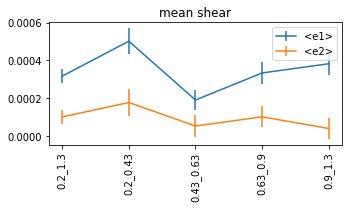

In [11]:
e1_arr = np.zeros(len(z_min_arr))
e1_e_arr = np.zeros(len(z_min_arr))
e2_arr = np.zeros(len(z_min_arr))
e2_e_arr = np.zeros(len(z_min_arr))
for i,z_min in enumerate(z_min_arr):
    z_max = z_max_arr[i]
    binx = '{0}_{1}'.format(z_min,z_max)
    print binx
    e1_k = dict_tot[binx]['e1'][dict_tot[binx]['info']['mask_sims']]
    e2_k = dict_tot[binx]['e2'][dict_tot[binx]['info']['mask_sims']]
    e1_j = np.zeros(n_jck+1)
    e2_j = np.zeros(n_jck+1)
    e1_j[0] = np.mean(e1_k)
    e2_j[0] = np.mean(e2_k)
    
    for j in range(n_jck):
        #print ((bins[i],bins[i+1]))
        mask_bin1 = (dict_tot[binx]['info']['hpix'] != j)
        e1_j[j+1] = np.mean(e1_k[mask_bin1])
        e2_j[j+1] = np.mean(e2_k[mask_bin1])
        
    cov_e1 = covariance_scalar_jck(e1_j[1:],n_jck, type_c = 'jackknife')
    cov_e2 = covariance_scalar_jck(e2_j[1:],n_jck, type_c = 'jackknife')
    e1_arr[i] = e1_j[0]
    e1_e_arr[i] = cov_e1['err']
    e2_arr[i] =  e2_j[0]
    e2_e_arr[i] = cov_e2['err']

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)

xxx = []
for i,z_min in enumerate(z_min_arr):
    z_max = z_max_arr[i]
    binx = '{0}_{1}'.format(z_min,z_max)
    xxx.append(binx)
plt.errorbar(np.arange(len(e1_arr)),e1_arr,e1_e_arr, label ='<e1>')
plt.errorbar(np.arange(len(e2_arr)),e2_arr,e2_e_arr, label ='<e2>')

yticks = ax.xaxis.get_major_ticks()
plt.xticks(np.arange(len(xxx)),xxx, rotation='90')
plt.legend()
plt.title('mean shear')

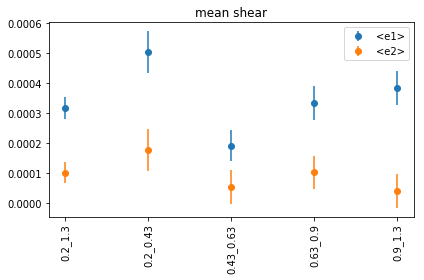

In [30]:
plt.errorbar(np.arange(len(e1_arr)),e1_arr,e1_e_arr, label ='<e1>',fmt = 'o')
plt.errorbar(np.arange(len(e2_arr)),e2_arr,e2_e_arr, label ='<e2>',fmt = 'o')

yticks = ax.xaxis.get_major_ticks()
plt.xticks(np.arange(len(xxx)),xxx, rotation='90')
plt.legend()
plt.title('mean shear')
plt.savefig("mean_shear.pdf")

# Make systematic_maps file

In [6]:
'''
It loads into memory a number of systematic maps to correlate with kE,kB maps.
Observing condition maps can be found here:
https://cdcvs.fnal.gov/redmine/projects/des-y3/wiki/Systematic_maps_v2
'''

import pyfits as pf

bands = ['i'] #,'g','r','z']

path_sys = "/global/cscratch1/sd/mgatti/Input_files/"
systematic_maps = dict()  

'''
Maps that DOES NOT depend on the tomographic bin. Maps that depend 
on the tomographic bin will be loaded later on 
'''


#Invert seeing with airmass! ********


 
# SEEING *****************************************************
for band in bands:
    mute = pf.open(path_sys+'/systematic_maps/y3a2_{0}_o.4096_t.32768_FWHM.WMEAN_EQU.fits'.format(band))
    nside_sys = 4096
    sys_map = np.zeros(hp.nside2npix(nside_sys))
    sys_map[mute[1].data['PIXEL']] = mute[1].data['SIGNAL']
    if nside_sys != nside :
        sys_map = hp.ud_grade(sys_map, nside, order_in = 'NESTED', order_out = 'RING')
    index = mute[1].data['PIXEL']
    sys_map2 = np.zeros(hp.nside2npix(nside)) 
    n_map =  np.zeros(hp.nside2npix(nside))
    decxx,raxx =  IndexToDeclRa(index, 4096,nest=True)
    pix = convert_to_pix_coord(raxx,decxx, nside=nside)
    unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)
    n_map[unique_pix] += np.bincount(idx_rep, weights=np.ones(len(pix)))
    sys_map2[unique_pix] += np.bincount(idx_rep, weights=mute[1].data['SIGNAL'])
    sys_map2[n_map!=0.]=sys_map2[n_map!=0.]/n_map[n_map!=0.]

    mute_dict = dict()
    mute_dict.update({'map' : sys_map2})
    mute_dict.update({'map_old' : sys_map})
    mute_dict.update({'title' : 'seeing_{0}'.format(band)})
    mute_dict.update({'fractional' : True})
    systematic_maps.update({mute_dict['title']  : mute_dict})
    # *********************

    
    
# AIRMASS *****************************************************
for band in bands:
    mute = pf.open(path_sys+'/systematic_maps/y3a2_{0}_o.4096_t.32768_AIRMASS.WMEAN_EQU.fits'.format(band))
    nside_sys = 4096
    sys_map = np.zeros(hp.nside2npix(nside_sys))
    sys_map[mute[1].data['PIXEL']] = mute[1].data['SIGNAL']
    if nside_sys != nside :
        sys_map = hp.ud_grade(sys_map, nside, order_in = 'NESTED', order_out = 'RING')

    index = mute[1].data['PIXEL']
    sys_map2 = np.zeros(hp.nside2npix(nside)) 
    n_map =  np.zeros(hp.nside2npix(nside))
    decxx,raxx =  IndexToDeclRa(index, 4096,nest=True)
    pix = convert_to_pix_coord(raxx,decxx, nside=nside)
    unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)
    n_map[unique_pix] += np.bincount(idx_rep, weights=np.ones(len(pix)))
    sys_map2[unique_pix] += np.bincount(idx_rep, weights=mute[1].data['SIGNAL'])
    sys_map2[n_map!=0.]=sys_map2[n_map!=0.]/n_map[n_map!=0.]
    mute_dict = dict()
    mute_dict.update({'map' : sys_map2})
    mute_dict.update({'map_old' : sys_map})
    
    mute_dict.update({'title' : 'airmass_{0}'.format(band)})
    mute_dict.update({'fractional' : True})
    systematic_maps.update({mute_dict['title']  : mute_dict})
    # *********************

# EXPTIME *****************************************************
for band in bands:
    mute = pf.open(path_sys+'/systematic_maps/y3a2_{0}_o.4096_t.32768_EXPTIME.SUM_EQU.fits'.format(band))
    nside_sys = 4096
    sys_map = np.zeros(hp.nside2npix(nside_sys))
    sys_map[mute[1].data['PIXEL']] = mute[1].data['SIGNAL']
    if nside_sys != nside :
        sys_map = hp.ud_grade(sys_map, nside, order_in = 'NESTED', order_out = 'RING')


    index = mute[1].data['PIXEL']
    sys_map2 = np.zeros(hp.nside2npix(nside)) 
    n_map =  np.zeros(hp.nside2npix(nside))
    decxx,raxx =  IndexToDeclRa(index, 4096,nest=True)
    pix = convert_to_pix_coord(raxx,decxx, nside=nside)
    unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)
    n_map[unique_pix] += np.bincount(idx_rep, weights=np.ones(len(pix)))
    sys_map2[unique_pix] += np.bincount(idx_rep, weights=mute[1].data['SIGNAL'])
    sys_map2[n_map!=0.]=sys_map2[n_map!=0.]/n_map[n_map!=0.]
    
    
    mute_dict = dict()
    mute_dict.update({'map' : sys_map2})
    mute_dict.update({'map_old' : sys_map})
    mute_dict.update({'title' : 'exp_time_{0}'.format(band)})
    mute_dict.update({'fractional' : True})
    systematic_maps.update({mute_dict['title']  : mute_dict})


# DEPTH *****************************************************
for band in bands:
    mute = pf.open(path_sys+'/systematic_maps/y3a2_gold_2_2_mof_nside4096_nest_{0}_depth.fits'.format(band))
    nside_sys = 4096
    sys_map = np.zeros(hp.nside2npix(nside_sys))
    sys_mapa = ((mute[1].data['I'])).reshape(201326592)#, n2r = True)
    index = np.arange(len(sys_map))[sys_mapa>0.0000000001]
    if nside_sys != nside :
        sys_map = hp.ud_grade(sys_mapa, nside, order_in = 'NESTED', order_out = 'RING')

    
    
    sys_map2 = np.zeros(hp.nside2npix(nside)) 
    n_map =  np.zeros(hp.nside2npix(nside))
    decxx,raxx =  IndexToDeclRa(index, 4096,nest=True)
    pix = convert_to_pix_coord(raxx,decxx, nside=nside)
    unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)
    n_map[unique_pix] += np.bincount(idx_rep, weights=np.ones(len(pix)))
    sys_map2[unique_pix] += np.bincount(idx_rep, weights=sys_mapa[sys_mapa>0.0000000001])
    sys_map2[n_map!=0.]=sys_map2[n_map!=0.]/n_map[n_map!=0.]
    sys_map[~(n_map!=0.)]=0.
    
    mute_dict = dict()
    mute_dict.update({'map' : sys_map2})
    mute_dict.update({'map_old' : sys_map})
    mute_dict.update({'title' : 'depth_{0}'.format(band)})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

# SKYVAR BRIGHTNESS *****************************************************
for band in bands:
    mute = pf.open(path_sys+'/systematic_maps/y3a2_{0}_o.4096_t.32768_SKYVAR.UNCERTAINTY_EQU.fits'.format(band))
    nside_sys = 4096
    sys_map = np.zeros(hp.nside2npix(nside_sys))
    sys_map[mute[1].data['PIXEL']] = mute[1].data['SIGNAL']
    if nside_sys != nside :
        sys_map = hp.ud_grade(sys_map, nside, order_in = 'NESTED', order_out = 'RING')


    index = mute[1].data['PIXEL']
    sys_map2 = np.zeros(hp.nside2npix(nside)) 
    n_map =  np.zeros(hp.nside2npix(nside))
    decxx,raxx =  IndexToDeclRa(index, 4096,nest=True)
    pix = convert_to_pix_coord(raxx,decxx, nside=nside)
    unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)
    n_map[unique_pix] += np.bincount(idx_rep, weights=np.ones(len(pix)))
    sys_map2[unique_pix] += np.bincount(idx_rep, weights=mute[1].data['SIGNAL'])
    sys_map2[n_map!=0.]=sys_map2[n_map!=0.]/n_map[n_map!=0.]

    mute_dict = dict()
    mute_dict.update({'map' : sys_map2})
    mute_dict.update({'map_old' : sys_map})
    mute_dict.update({'title' : 'brightness_{0}'.format(band)})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

#************************************************************************

if 1==1:
    
    mute_dict = dict()
    mute_dict.update({'title' : 'q1_stars'.format(band)})
    mute_dict.update({'map' : q1s_map})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

    mute_dict = dict()
    mute_dict.update({'title' : 'q2_stars'.format(band)})
    mute_dict.update({'map' : q2s_map})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})


    mute_dict = dict()
    mute_dict.update({'title' : 't1_stars'.format(band)})
    mute_dict.update({'map' : t1s_map})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

    mute_dict = dict()
    mute_dict.update({'title' : 't2_stars'.format(band)})
    mute_dict.update({'map' : t2s_map})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

for binx in dict_tot.keys():

    dict_tot[binx].update({'p1_stars':p1s_map})
    dict_tot[binx].update({'p2_stars':p2s_map})
    dict_tot[binx].update({'q1_stars':q1s_map})
    dict_tot[binx].update({'q2_stars':q2s_map})
    dict_tot[binx].update({'t1_stars':t1s_map})
    dict_tot[binx].update({'t2_stars':t2s_map})
    dict_tot[binx].update({'size_stars':size_map})
    dict_tot[binx].update({'size_stars_t':size})
    dict_tot[binx].update({'p1_stars_t':p1})
    dict_tot[binx].update({'p2_stars_t':p2})
    dict_tot[binx].update({'q1_stars_t':q1})
    dict_tot[binx].update({'q2_stars_t':q2})
    dict_tot[binx].update({'t1_stars_t':t1})
    dict_tot[binx].update({'t2_stars_t':t2})
    dict_tot[binx].update({'e1_stars_t':e1_o})
    dict_tot[binx].update({'e2_stars_t':e2_o})
    dict_tot[binx].update({'e1_stars':e1o_map})
    dict_tot[binx].update({'e2_stars':e2o_map})


print 'done'

save_obj(path_sys+"/systematic_maps",systematic_maps)

done


# Compute  correlations systematics with mean kE,kB, e1,e2

In [7]:
'''
!! To be run, first run the routine modules below! !!

2(3) different methods are used to estimate the impact of systematic on mean kE,kB.

1st method *************
The idea is similar to what has been done in Jack's paper.
Linear fit to every systematic map (kE = F(sys) = A*sys + b).
Quadratic and Cubic fit implemented as well.
At the end, summary plots of chi2 of the null hypothesis for every 
systematic map (individually) are presented.

This quanitity is compared to chi68 from sims (if provided).

2nd method *************

For every systematic , slope is computed using a 3-point stencil derivative.
This approach allows to compute a global chi2 among all the systemaitc maps.
(method1 doesn't allow that, the covariance would be too large and difficult to estimate)

Both method includes the possibility to load the covariance from sims - 
I will upload the code for it subsequentially as soon as the sims will be finalized.
So far, errors from jackknife only.

n.b.:
The code doesn't compute the correlations
    if key != kE_label:
    if (key == 'snr' and kE_label =='kE') or (key == 'size_ratio' and kE_label =='kE') or (key == 'E1' and kE_label =='kE') or (key == 'E2' and kE_label =='kE'):

with the full footprint and 1000 jackknife is a bit slow..
'''

#***************************************
#              INPUT
#***************************************

rewrite = False
    
#One could provide covariances from sims (not included now)
cov_ext_kE = False #vector_kE
cov_ext_kB = False #vector_kB 


# *****************************************
dict_systematics_tot_K = dict()
dict_systematics_tot_E = dict()
dict_systematics_tot_BPZ = dict()
systematic_maps_binx = dict()
for ii,z_min in enumerate(z_min_arr):
    # *********************************
    z_max = z_max_arr[ii]
    binx = '{0}_{1}'.format(z_min,z_max)
    
    '''
    Maps that  DEPENDS on the tomographic bin: 
    
    '''
    print "loading maps"
    # q1 *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'q1'})
    mute_dict.update({'map' : dict_tot[binx]['q1']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

    # q2 *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'q2'})
    mute_dict.update({'map' : dict_tot[binx]['q2']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

    # p1 *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'p1'})
    mute_dict.update({'map' : dict_tot[binx]['p1']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

    # p2 *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'p2'})
    mute_dict.update({'map' : dict_tot[binx]['p2']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})
 
    # t1 *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 't1'})
    mute_dict.update({'map' : dict_tot[binx]['t1']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

    # t2 *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 't2'})
    mute_dict.update({'map' : dict_tot[binx]['t2']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})


    
    # kE *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'kE'})
    mute_dict.update({'map' : dict_tot[binx]['EE']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

    # kB *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'kB'})
    mute_dict.update({'map' : dict_tot[binx]['BB']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

    # E1 *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'E1'})
    mute_dict.update({'map' : dict_tot[binx]['e1']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

    # E2 *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'E2'})
    mute_dict.update({'map' : dict_tot[binx]['e2']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title'] : mute_dict})

    # PSF_E1 *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'PSF_E1'})
    mute_dict.update({'map' : dict_tot[binx]['psf_e1']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

    # PSF_E2 *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'PSF_E2'})
    mute_dict.update({'map' : dict_tot[binx]['psf_e2']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})


    # PSF_SIZE *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'PSF_SIZE'})
    mute_dict.update({'map' : dict_tot[binx]['psf_size']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

    # SNR*****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'snr'})
    mute_dict.update({'map' : dict_tot[binx]['snr']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})


    # SIZE RATIO *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'size_ratio'})
    mute_dict.update({'map' : dict_tot[binx]['size_ratio']})
    mute_dict.update({'fractional' : False})
    mute_dict.update({'max_f' : 4.})
    mute_dict.update({'min_f' : 0.})
    systematic_maps.update({mute_dict['title']  : mute_dict})
    systematic_maps_binx.update({binx:systematic_maps})
    print "done"
    
    # bpz_zmc *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'bpz_zmc'})
    mute_dict.update({'map' : dict_tot[binx]['bpz_zmc']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})

    # bpz_zmean *****************************************************
    mute_dict = dict()
    mute_dict.update({'title' : 'bpz_zmean'})
    mute_dict.update({'map' : dict_tot[binx]['bpz_zmean']})
    mute_dict.update({'fractional' : False})
    systematic_maps.update({mute_dict['title']  : mute_dict})
    '''
    mean correlation computation
    '''

    print '\n',binx,'\n'
    weight = np.zeros(hp.nside2npix(nside))
    
    kE = dict_tot[binx]['EE']
    add_label = '_w0'
    
    kE_label = 'kE'

    hpix_type = 'normal'
    name_foder = name_folder_x+'_{0}_{1}/'.format(z_min,z_max) 
    mmm_1 = dict()

    # *****************************************
    systematics_dict_kE_1 = dict()

    path_syst = name_foder + '/apoly_systematics_dict_kE_{0}_{1}'.format(add_label,nside)

    if not rewrite and os.path.exists(path_syst+'.pkl'):
        systematics_dict_kE_1 = load_obj(path_syst)
    else:    
        mute_1 = do_analysis_3(kE,kE_label,weight,systematic_maps,dict_tot[binx]['info'])
        systematics_dict_kE_1.update({add_label : mute_1})
        save_obj(path_syst,systematics_dict_kE_1)
    mmm_1.update({kE_label:systematics_dict_kE_1})

    
    # *****************************************
    
    kE = dict_tot[binx]['BB']
    kE_label = 'kB'
    path_syst = name_foder + '/apoly_systematics_dict_kB_{0}_{1}'.format(add_label,nside)

    systematics_dict_kB_1 = dict()

    if not rewrite and os.path.exists(path_syst+'.pkl'):
        systematics_dict_kB_1 = load_obj(path_syst)

    else:
        mute_1= do_analysis_3(kE,kE_label,weight,systematic_maps,dict_tot[binx]['info'])
        systematics_dict_kB_1.update({add_label : mute_1})
        save_obj(path_syst,systematics_dict_kB_1)

    mmm_1.update({kE_label:systematics_dict_kB_1})
    dict_systematics_tot_K.update({binx:mmm_1})


    mmm_1 = dict()
    mmm_2 = dict()
    
    rewrite = False
    

    # *****************************************
    kE = dict_tot[binx]['e1']
    kE_label = 'E1'
    path_syst = name_foder + '/apoly_systematics_dict_E1_{0}_{1}'.format(add_label,nside)
    systematics_dict_kB_1 = dict()


    if not rewrite and os.path.exists(path_syst+'.pkl'):
        systematics_dict_kB_1 = load_obj(path_syst)

    else:
        mute_1= do_analysis_3(kE,kE_label,weight,systematic_maps,dict_tot[binx]['info'])     
        systematics_dict_kB_1.update({add_label : mute_1})
        save_obj(path_syst,systematics_dict_kB_1)
        
    mmm_1.update({kE_label:systematics_dict_kB_1})
    dict_systematics_tot_E.update({binx:mmm_1})
   

    # *****************************************
    kE = dict_tot[binx]['e2']
    kE_label = 'E2'
    path_syst = name_foder + '/apoly_systematics_dict_E2_{0}_{1}'.format(add_label,nside)
    systematics_dict_kB_1 = dict()


    if not rewrite and os.path.exists(path_syst+'.pkl'):
        systematics_dict_kB_1 = load_obj(path_syst)

    else:
        mute_1= do_analysis_3(kE,kE_label,weight,systematic_maps,dict_tot[binx]['info'])       
        systematics_dict_kB_1.update({add_label : mute_1})
        save_obj(path_syst,systematics_dict_kB_1)
        
    mmm_1.update({kE_label:systematics_dict_kB_1})
    dict_systematics_tot_E.update({binx:mmm_1})
    
    
    mmm_1 = dict()
    
    # *****************************************
    kE = dict_tot[binx]['bpz_zmc']
    kE_label = 'bpz_zmc'
    path_syst = name_foder + '/apoly_systematics_dict_zmc_{0}_{1}'.format(add_label,nside)
    systematics_dict_kB_1 = dict()


    if not rewrite and os.path.exists(path_syst+'.pkl'):
        systematics_dict_kB_1 = load_obj(path_syst)

    else:
        mute_1= do_analysis_3(kE,kE_label,weight,systematic_maps,dict_tot[binx]['info'])       
        systematics_dict_kB_1.update({add_label : mute_1})
        save_obj(path_syst,systematics_dict_kB_1)
        
    mmm_1.update({kE_label:systematics_dict_kB_1})
    dict_systematics_tot_BPZ.update({binx:mmm_1})
   
print 'done'

loading maps
done

0.2_1.3 

loading maps
done

0.2_0.43 

loading maps
done

0.43_0.63 

loading maps
done

0.63_0.9 

loading maps
done

0.9_1.3 

done


# Summary plots

In [8]:
def make_plot_final1(dict_final1, label,z_minz,z_maxz,nside,n_jck=1000,type_c = 'jackknife',fact = False,Except=False,only=False,size_x = 10,size_y=10,cchi=True):
    import copy
    fig, ax = plt.subplots(len(z_minz),1,sharex=True, sharey=True, figsize=(size_x,size_y))
    fig.subplots_adjust(wspace=0.,hspace=0.)
    
    bd = dict()
    for i in range(len(z_minz)):
        #i = 4-i
        z_min = z_minz[i]
        z_max = z_maxz[i]
        #print z_min,z_max
        binx = '{0}_{1}'.format(z_min,z_max)
        fold = './output_new1_{0}_{1}_{2}/'.format(z_min,z_max,nside)
        #for count in range(20):
        if 1==1:
                if 1==1:
                    ll = []
                    ll1 = []
                    key = binx
                    m1 = 0
                    count = 0
                    for key1 in dict_final1[key].keys():
                        if only: 
                            new_key = only[key1]
                            m1+=len(only[key1])
                        elif Except:
                            new_key = []
                            for ii,jj in enumerate(~np.in1d(dict_final1[key][key1]['_w0'].keys(),Except[key1])):
                                if jj:
                                    new_key.append(dict_final1[key][key1]['_w0'].keys()[ii])
                            m1 += len(new_key)
                        else:
                            m1 += len(dict_final1[key][key1]['_w0'].keys())
                            new_key = dict_final1[key][key1]['_w0'].keys()
                    b1 = np.zeros((m1,n_jck+1))
                    for key1 in dict_final1[key].keys():
                        
                        if only: 
                            new_key = only[key1]
             
                        elif Except:
                            new_key = []
                            for ii,jj in enumerate(~np.in1d(dict_final1[key][key1]['_w0'].keys(),Except[key1])):
                                if jj:
                                    new_key.append(dict_final1[key][key1]['_w0'].keys()[ii])
                        else:
                            new_key = dict_final1[key][key1]['_w0'].keys()
                            
                        for key2 in new_key:
                            b1[count,:]= dict_final1[key][key1]['_w0'][key2]['b_arr']
                            count+=1
                            ll.append('{0}_{1}'.format(key1,key2))


                if fact:
                    b1 = b1
                    b_dict1 = covariance_jck(b1[:,1:]*fact[binx], n_jck, type_cov = type_c)
                else:
                    b_dict1 = covariance_jck(b1[:,1:], n_jck, type_cov = type_c)
                
                
                ax[i].set_ylabel('bin : {0} \n b/b_err'.format(binx))
                yticks = ax[i].yaxis.get_major_ticks()
                yticks[0].label1.set_visible(False)  
                
                
                ax[i].scatter(np.arange(len( b1[:,0]))+1, b1[:,0]/b_dict1['err'],label = 'b/b_err')

                
                # high correlations!
                mm = ((b1[:,0]/b_dict1['err']>3.8))#^((b1[:,0]/b_dict1['err']<-3.8))
                yc = b1[:,0]/b_dict1['err']
                xc = np.arange(len( b1[:,0]))+1
                for hh in range(len(mm[mm])):
                    ax[i].annotate( '{0:.2f}'.format(yc[mm][hh]), ((xc[mm][hh]-0.5),3.1),transform=ax[i].transAxes)
                    
                
                if len(mm[mm])>0:
                    yc[mm] = 3.8
                    ax[i].scatter(xc[mm],yc[mm],  color = 'b', marker = '^')

            
                mm = ((b1[:,0]/b_dict1['err']<-3.8))#^((b1[:,0]/b_dict1['err']<-3.8))
                yc = b1[:,0]/b_dict1['err']
                xc = np.arange(len( b1[:,0]))+1
                for hh in range(len(mm[mm])):
                    ax[i].annotate( '{0:.2f}'.format(yc[mm][hh]), ((xc[mm][hh]-0.5),-3.1),transform=ax[i].transAxes)
            
            
                if len(mm[mm])>0:
                    yc[mm] = -3.6
                    ax[i].scatter(xc[mm],yc[mm],  color = 'b', marker = 'v')
            
            
                plt.xticks(np.arange(len( b1[:,0]))+1,ll, rotation='90')
                ax[0].text(0.4,1.05 , '{0}'.format(label),transform=ax[0].transAxes)
                
                w = b1[:,0]
                cns = np.zeros(len(b1[:,0]))
                from scipy import linalg
                inv_cov = linalg.inv(b_dict1['cov'])
                N_p = n_jck
                p_p = len(cns)
                f_hartlap = (N_p-1.)/(N_p-p_p-2.)
                #print f_hartlap
                chi2red =  (np.matmul((w-cns),np.matmul(inv_cov,(w-cns))))/(len(cns)*f_hartlap)
                if cchi:
                    ax[i].text(0.05 , 0.85 , '$\chi^2$/dof : {0:.2f}/{1:.0f}'.format(chi2red*len(cns),len(cns)-1),transform=ax[i].transAxes)#,p2s(1 - stats.t.cdf(chi2red,df=len(cns)-1))),transform=ax[i].transAxes)
                
                
                ax[i].plot([0.,len( b1[:,0])+1],[-2,-2],linestyle="dashed",color="r")
                ax[i].plot([0.,len( b1[:,0])+1],[2,2],linestyle="dashed",color="r")
                
                ax[i].xaxis.label.set_size(14)
                ax[i].yaxis.label.set_size(12)
                
                plt.xlim([0.,len( b1[:,0])+1])
                plt.ylim([-4.,4])
                

        fig.subplots_adjust(wspace=0.,hspace=0.)
        bd.update({binx:[b_dict1,b1]})
    return bd, ll

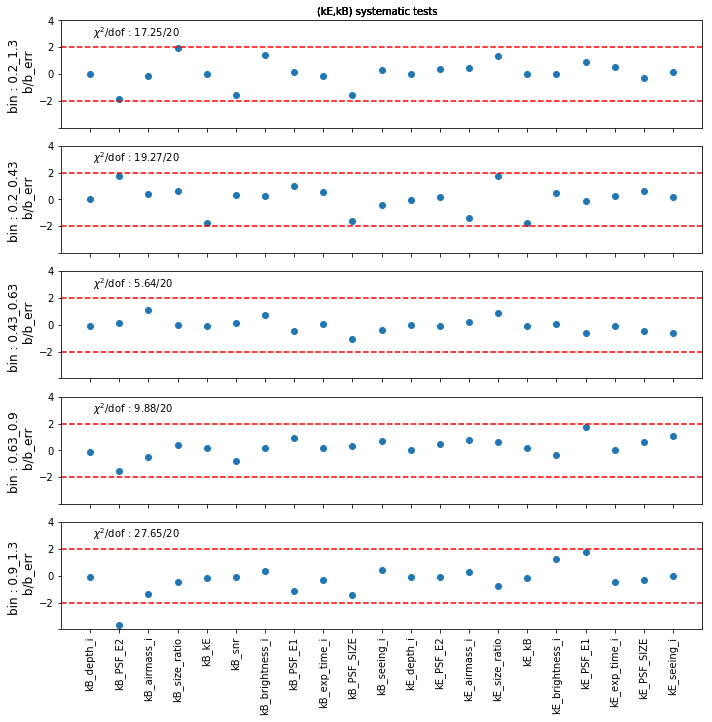

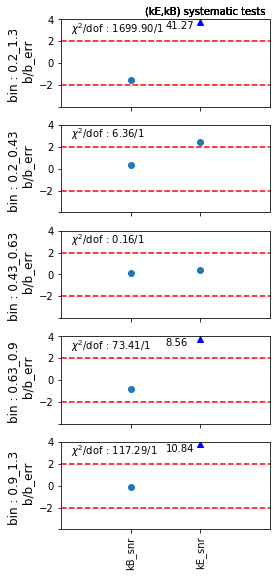

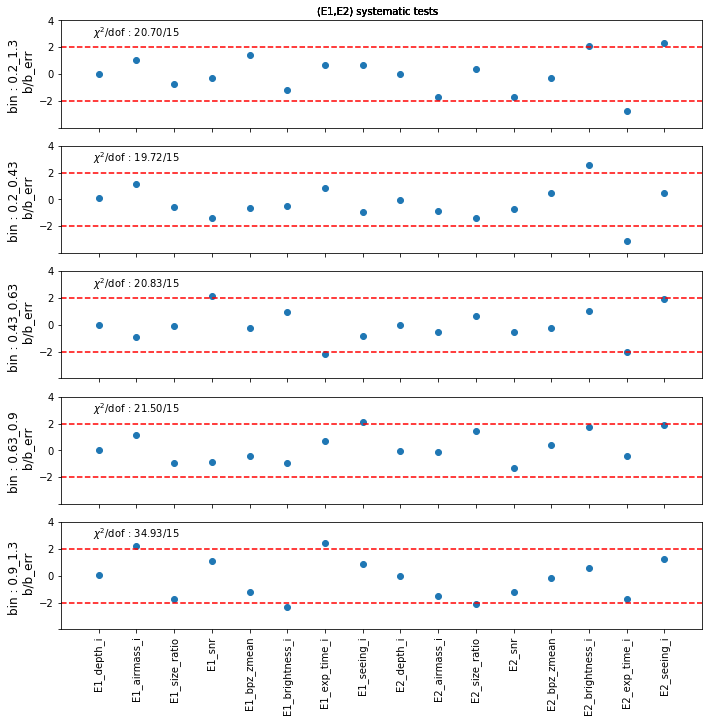

In [9]:
#final?
n_jck = 1000

b_dict1a, label = make_plot_final1(dict_systematics_tot_K,'(kE,kB) systematic tests',z_min_arr,z_max_arr,nside,Except = {'kE':['snr','kE','E2','E1','q1_stars','q2_stars','t1_stars','t2_stars','q1','p1','p2','q2','t1','t2','bpz_zmean','bpz_zmc'],'kB':['E2','E1','kB','q1_stars','q2_stars','t1_stars','t2_stars','q1','q2','t1','p1','p2','t2','bpz_zmean','bpz_zmc']},n_jck=n_jck,type_c = 'jackknife')
plt.savefig("k_syst.pdf")
b_dict1b, label = make_plot_final1(dict_systematics_tot_K,'(kE,kB) systematic tests',z_min_arr,z_max_arr,nside,only = {'kE':['snr'],'kB':['snr']},n_jck=n_jck,type_c = 'jackknife',size_x = 4,size_y=8)
plt.savefig("k_syst_good.pdf")
b_dict_final, label_final = make_plot_final1(dict_systematics_tot_E,'(E1,E2) systematic tests',z_min_arr,z_max_arr,nside,Except ={'E2':["bpz_zmc","PSF_SIZE","PSF_E1","PSF_E2",'E2','E1','kE','kB','q1_stars','q2_stars','t1_stars','t2_stars','q1','q2','t1','t2','p1','p2'],'E1':["bpz_zmc","PSF_SIZE","PSF_E1","PSF_E2",'E1','E2','kE','kB','q1_stars','q2_stars','t1_stars','t2_stars','q1','q2','t1','t2','p1','p2']},n_jck=n_jck,type_c = 'jackknife')
plt.savefig("e_syst.pdf")


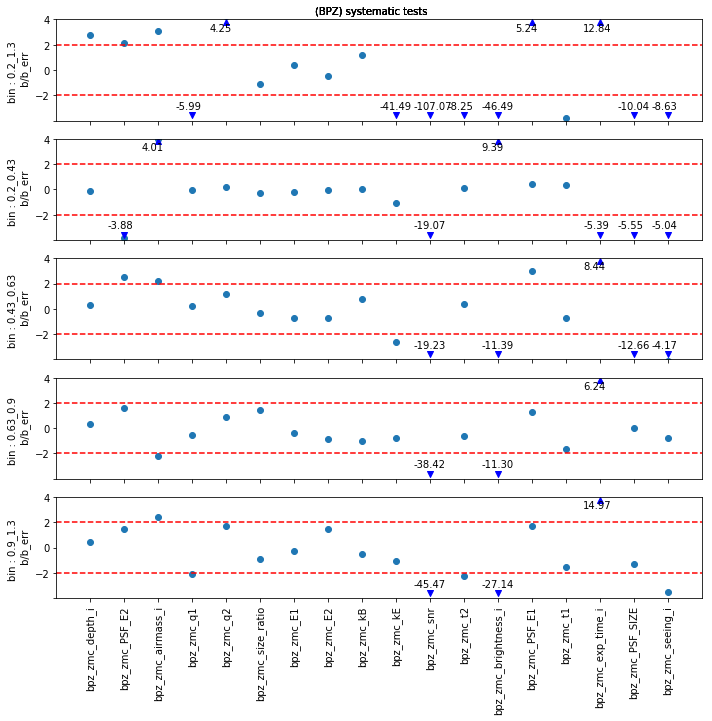

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
b_dict1a, label = make_plot_final1(dict_systematics_tot_BPZ,'(BPZ) systematic tests',z_min_arr,z_max_arr,Except = {'bpz_zmc':['q1_stars','q2_stars','t1_stars','t2_stars']},cchi=False,type_c = 'jackknife')


# Mean e vs PSF erros

0.2_1.3
fit E1/PSF_E1 : -0.0045 +- 0.0028 [sigma: -1.6190]
from PSF errors: -0.0025 +- 0.0018 [sigma: -1.4089]
fit E2/PSF_E2 : -0.0096 +- 0.0025 [sigma: -3.7769]
from PSF errors: -0.0063 +- 0.0017 [sigma: -3.7203]
0.2_0.43
fit E1/PSF_E1 : 0.0114 +- 0.0059 [sigma: 1.9386]
from PSF errors: 0.0035 +- 0.0041 [sigma: 0.8576]
fit E2/PSF_E2 : -0.0010 +- 0.0054 [sigma: -0.1891]
from PSF errors: -0.0009 +- 0.0040 [sigma: -0.2177]
0.43_0.63
fit E1/PSF_E1 : -0.0058 +- 0.0045 [sigma: -1.2905]
from PSF errors: -0.0028 +- 0.0032 [sigma: -0.8900]
fit E2/PSF_E2 : -0.0000 +- 0.0043 [sigma: -0.0050]
from PSF errors: -0.0033 +- 0.0030 [sigma: -1.1168]
0.63_0.9
fit E1/PSF_E1 : -0.0094 +- 0.0048 [sigma: -1.9355]
from PSF errors: -0.0051 +- 0.0031 [sigma: -1.6366]
fit E2/PSF_E2 : -0.0171 +- 0.0042 [sigma: -4.0312]
from PSF errors: -0.0079 +- 0.0029 [sigma: -2.7327]
0.9_1.3
fit E1/PSF_E1 : -0.0075 +- 0.0045 [sigma: -1.6505]
from PSF errors: -0.0049 +- 0.0033 [sigma: -1.4749]
fit E2/PSF_E2 : -0.0158 +- 0.0048

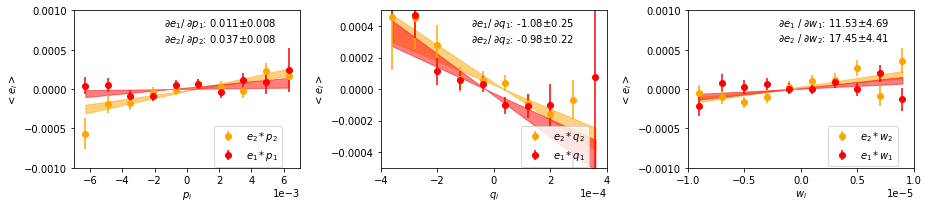

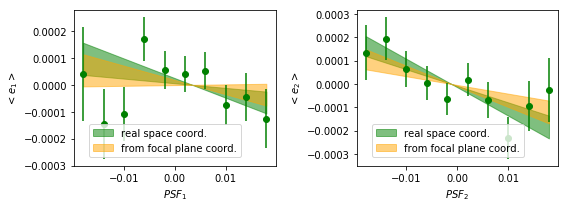

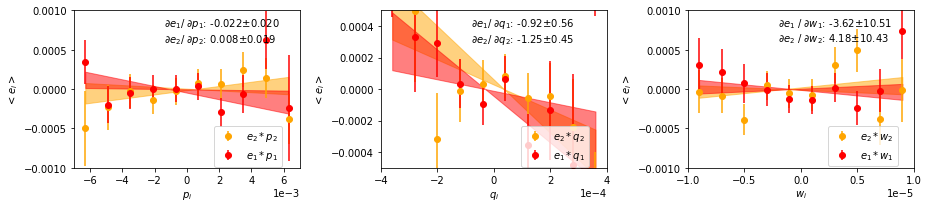

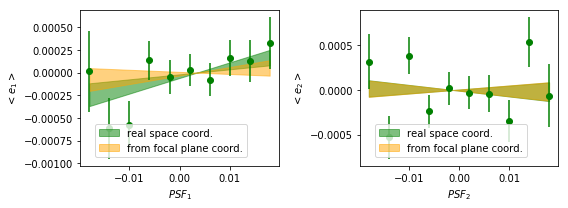

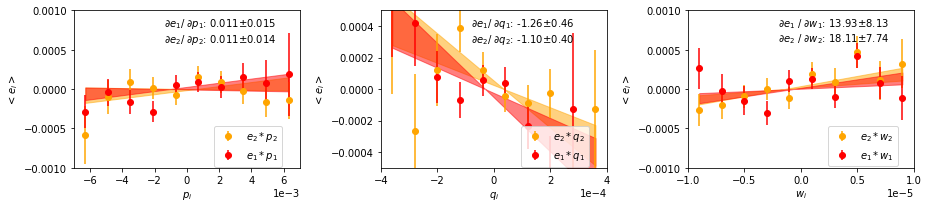

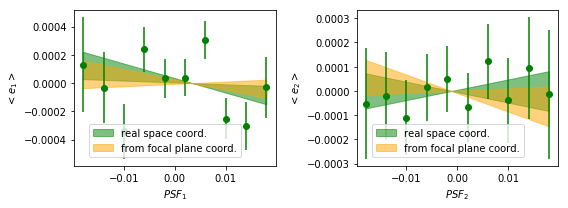

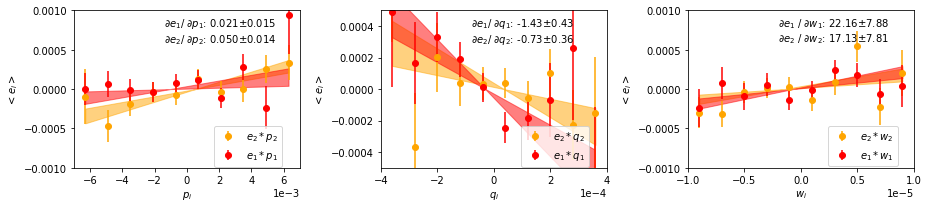

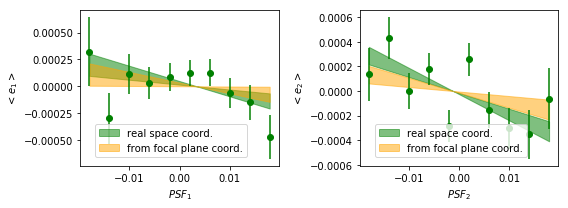

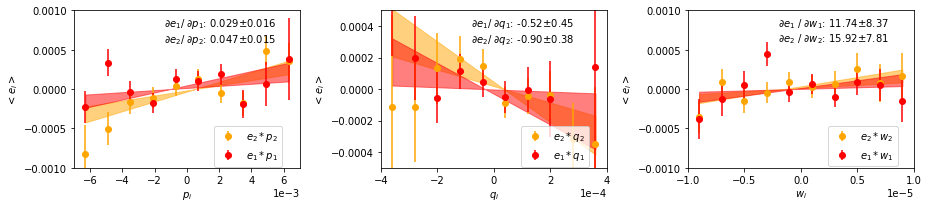

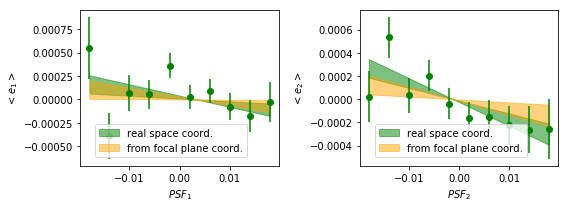

In [36]:
#A,y
resampling =1000
kk=""
PSFabe_dict = dict()
for ii,z_min in enumerate(z_min_arr):
    
    mute_dict = dict()
    # *********************************
    z_max = z_max_arr[ii]
    binx = '{0}_{1}'.format(z_min,z_max)
    maskj = [dict_tot[binx]['info']['mask_sims']]
    print binx
    # change of variables *********
    mut = np.polyfit(dict_tot[binx]['q1'+kk][maskj]-np.mean(dict_tot[binx]['q1'+kk][maskj]),dict_tot[binx]['p1'+kk][maskj],1,cov =True)
    dp1_dq1 = mut[0][0]
    mut = np.polyfit(dict_tot[binx]['t1'+kk][maskj]-np.mean(dict_tot[binx]['t1'+kk][maskj]),dict_tot[binx]['p1'+kk][maskj],1,cov =True)
    dp1_dw1 = mut[0][0]  
    mut = np.polyfit(dict_tot[binx]['p1'+kk][maskj]-np.mean(dict_tot[binx]['p1'+kk][maskj]),dict_tot[binx]['q1'+kk][maskj],1,cov =True)
    dq1_dp1 = mut[0][0]
    mut = np.polyfit(dict_tot[binx]['t1'+kk][maskj]-np.mean(dict_tot[binx]['t1'+kk][maskj]),dict_tot[binx]['q1'+kk][maskj],1,cov =True)
    dq1_dw1 = mut[0][0] 
    mut = np.polyfit(dict_tot[binx]['p1'+kk][maskj]-np.mean(dict_tot[binx]['p1'+kk][maskj]),dict_tot[binx]['t1'+kk][maskj],1,cov =True)
    dw1_dp1 = mut[0][0]
    mut = np.polyfit(dict_tot[binx]['q1'+kk][maskj]-np.mean(dict_tot[binx]['q1'+kk][maskj]),dict_tot[binx]['t1'+kk][maskj],1,cov =True)
    dw1_dq1 = mut[0][0]
    
    
    mut = np.polyfit(dict_tot[binx]['q2'+kk][maskj]-np.mean(dict_tot[binx]['q2'+kk][maskj]),dict_tot[binx]['p2'+kk][maskj],1,cov =True)
    dp2_dq2 = mut[0][0]
    mut = np.polyfit(dict_tot[binx]['t2'+kk][maskj]-np.mean(dict_tot[binx]['t2'+kk][maskj]),dict_tot[binx]['p2'+kk][maskj],1,cov =True)
    dp2_dw2 = mut[0][0]  
    mut = np.polyfit(dict_tot[binx]['p2'+kk][maskj]-np.mean(dict_tot[binx]['p2'+kk][maskj]),dict_tot[binx]['q2'+kk][maskj],1,cov =True)
    dq2_dp2 = mut[0][0]
    mut = np.polyfit(dict_tot[binx]['t2'+kk][maskj]-np.mean(dict_tot[binx]['t2'+kk][maskj]),dict_tot[binx]['q2'+kk][maskj],1,cov =True)
    dq2_dw2 = mut[0][0] 
    mut = np.polyfit(dict_tot[binx]['p2'+kk][maskj]-np.mean(dict_tot[binx]['p2'+kk][maskj]),dict_tot[binx]['t2'+kk][maskj],1,cov =True)
    dw2_dp2 = mut[0][0]
    mut = np.polyfit(dict_tot[binx]['q2'+kk][maskj]-np.mean(dict_tot[binx]['q2'+kk][maskj]),dict_tot[binx]['t2'+kk][maskj],1,cov =True)
    dw2_dq2 = mut[0][0]
    # *******************************
    dd1_dp2 =dict_systematics_tot_E[binx]['E1']['_w0']['p2']['b_arr']#[#0]
    dd1_dp2e =dict_systematics_tot_E[binx]['E1']['_w0']['p2']['b_err']#
    
    dd2_dp1 =dict_systematics_tot_E[binx]['E2']['_w0']['p1']['b_arr']#[0]
    dd2_dp1e =dict_systematics_tot_E[binx]['E2']['_w0']['p1']['b_err']#
    
    dd1_dp1 =dict_systematics_tot_E[binx]['E1']['_w0']['p1']['b_arr']#[0]
    dd1_dp1e =dict_systematics_tot_E[binx]['E1']['_w0']['p1']['b_err']#

    dd2_dp2 =dict_systematics_tot_E[binx]['E2']['_w0']['p2']['b_arr']#[0]
    dd2_dp2e =dict_systematics_tot_E[binx]['E2']['_w0']['p2']['b_err']#
    
    
    
    
    dd1_dq2 =dict_systematics_tot_E[binx]['E1']['_w0']['q2']['b_arr']#[0]
    dd1_dq2e =dict_systematics_tot_E[binx]['E1']['_w0']['q2']['b_err']#

    
    dd2_dq1 =dict_systematics_tot_E[binx]['E2']['_w0']['q1']['b_arr']#[0]
    dd2_dq1e =dict_systematics_tot_E[binx]['E2']['_w0']['q1']['b_err']#
    
    dd1_dq1 =dict_systematics_tot_E[binx]['E1']['_w0']['q1']['b_arr']#[0]
    dd1_dq1e =dict_systematics_tot_E[binx]['E1']['_w0']['q1']['b_err']#
    dd2_dq2 =dict_systematics_tot_E[binx]['E2']['_w0']['q2']['b_arr']#[0]
    dd2_dq2e =dict_systematics_tot_E[binx]['E2']['_w0']['q2']['b_err']#
    
    dd1_dw1 =dict_systematics_tot_E[binx]['E1']['_w0']['t1']['b_arr']#[0]
    dd1_dw1e =dict_systematics_tot_E[binx]['E1']['_w0']['t1']['b_err']#
    
    dd2_dw2 =dict_systematics_tot_E[binx]['E2']['_w0']['t2']['b_arr']#[0]
    dd2_dw2e =dict_systematics_tot_E[binx]['E2']['_w0']['t2']['b_err']#
    
    mut = np.polyfit(dict_tot[binx]['psf_e2'][maskj]-np.mean(dict_tot[binx]['psf_e2'][maskj]),dict_tot[binx]['q2'+kk][maskj],1,cov =True)
    dq2_dPSF2 =  mut[0][0]
    mut = np.polyfit(dict_tot[binx]['psf_e1'][maskj]-np.mean(dict_tot[binx]['psf_e1'][maskj]),dict_tot[binx]['q1'+kk][maskj],1,cov =True)
    dq1_dPSF1 =  mut[0][0]

    mut = np.polyfit(dict_tot[binx]['psf_e2'][maskj]-np.mean(dict_tot[binx]['psf_e2'][maskj]),dict_tot[binx]['t2'+kk][maskj],1,cov =True)
    dw2_dPSF2 =  mut[0][0]
    mut = np.polyfit(dict_tot[binx]['psf_e1'][maskj]-np.mean(dict_tot[binx]['psf_e1'][maskj]),dict_tot[binx]['t1'+kk][maskj],1,cov =True)
    dw1_dPSF1 =  mut[0][0]
        
        
    mut = np.polyfit(dict_tot[binx]['psf_e2'][maskj]-np.mean(dict_tot[binx]['psf_e2'][maskj]),dict_tot[binx]['p2'+kk][maskj],1,cov =True)
    dp2_dPSF2 =  mut[0][0]
    mut = np.polyfit(dict_tot[binx]['psf_e1'][maskj]-np.mean(dict_tot[binx]['psf_e1'][maskj]),dict_tot[binx]['p1'+kk][maskj],1,cov =True)
    dp1_dPSF1 =  mut[0][0]
        
    y = np.array([dd2_dp2,dd2_dq2,dd2_dw2])
    
    A = np.array([[1.,dq2_dp2,dw2_dp2],
        [dp2_dq2,1.,dw2_dq2],
        [dp2_dw2,dq2_dw2,1.]])

    xd = np.linalg.solve(A,y)
    
    mute_dict['E2_mean_alpha'] =  covariance_scalar_jck(xd[0,:],1000,"jackknife")["mean"]
    mute_dict['E2_err_alpha'] = covariance_scalar_jck(xd[0,:],1000,"jackknife")["err"]
    mute_dict['E2_mean_beta'] =  covariance_scalar_jck(xd[1,:],1000,"jackknife")["mean"]
    mute_dict['E2_err_beta'] = covariance_scalar_jck(xd[1,:],1000,"jackknife")["err"]
    mute_dict['E2_mean_eta'] =  covariance_scalar_jck(xd[2,:],1000,"jackknife")["mean"]
    mute_dict['E2_err_eta'] = covariance_scalar_jck(xd[2,:],1000,"jackknife")["err"]
    mute_dict['E2_y'] = y
    
    
    xdd = [mute_dict['E2_mean_alpha'] ,mute_dict['E2_mean_beta'] ,mute_dict['E2_mean_eta'] ]
    
    mute_dict['E2_y_p'] = [[(xdd*np.array([1.,dq2_dp2,dw2_dp2]))/y[0][0]],
                          [(xdd*np.array([dp2_dq2,1.,dw2_dq2]))/y[1][0]],
                          [(xdd*np.array([dp2_dw2,dq2_dw2,1.]))/y[2][0]]]
    
    #print np.array(mute_dict['E2_y_p'])[0]
    #print "E2) alpha: {0:3.3f}+-{3:3.3f} beta: {1:3.1f}+-{4:3.1f}  eta: {2:3.1f}+-{5:3.1f}".format(mute_dict['E2_mean_alpha'] ,mute_dict['E2_mean_beta'] ,mute_dict['E2_mean_eta'],mute_dict['E2_err_alpha'] ,mute_dict['E2_err_beta'] ,mute_dict['E2_err_eta'])

    
    
    
    y = np.array([dd1_dp1,dd1_dq1,dd1_dw1])
    
    A = np.array([[1.,dq1_dp1,dw1_dp1],
        [dp1_dq1,1.,dw1_dq1],
        [dp1_dw1,dq1_dw1,1.]])

    xd = np.linalg.solve(A,y)
    
    mute_dict['E1_mean_alpha'] =  covariance_scalar_jck(xd[0,:],1000,"jackknife")["mean"]
    mute_dict['E1_err_alpha'] = covariance_scalar_jck(xd[0,:],1000,"jackknife")["err"]
    mute_dict['E1_mean_beta'] =  covariance_scalar_jck(xd[1,:],1000,"jackknife")["mean"]
    mute_dict['E1_err_beta'] = covariance_scalar_jck(xd[1,:],1000,"jackknife")["err"]
    mute_dict['E1_mean_eta'] =  covariance_scalar_jck(xd[2,:],1000,"jackknife")["mean"]
    mute_dict['E1_err_eta'] = covariance_scalar_jck(xd[2,:],1000,"jackknife")["err"]
    mute_dict['E1_y'] = y
    
    
    xdd = [mute_dict['E1_mean_alpha'] ,mute_dict['E1_mean_beta'] ,mute_dict['E1_mean_eta'] ]
    
    mute_dict['E1_y_p'] = [[(xdd*np.array([1.,dq1_dp1,dw1_dp1]))/y[0][0]],
                          [(xdd*np.array([dp1_dq1,1.,dw1_dq1]))/y[1][0]],
                          [(xdd*np.array([dp1_dw1,dq1_dw1,1.]))/y[2][0]]]
    
    #print np.array(mute_dict['E1_y_p'])[0]
    #print "E1) alpha: {0:3.3f}+-{3:3.3f} beta: {1:3.1f}+-{4:3.1f}  eta: {2:3.1f}+-{5:3.1f}".format(mute_dict['E1_mean_alpha'] ,mute_dict['E1_mean_beta'] ,mute_dict['E1_mean_eta'],mute_dict['E1_err_alpha'] ,mute_dict['E1_err_beta'] ,mute_dict['E1_err_eta'])

    
    if 1==1:
        #dedp *************************************************************************
        lenp = 10
        fig, ax = plt.subplots(1,3,sharex=False, sharey=False, figsize=(13,3))
        ssf = np.zeros((resampling,lenp))

        
        y = dict_tot[binx]['e2'][dict_tot[binx]['info']['mask_sims']]
        x = dict_tot[binx]['p2'][dict_tot[binx]['info']['mask_sims']]

        nbins = np.linspace(-0.007,0.007,lenp+1)
        mn = []
        mne = []
        for i in range(lenp):

            maska = (x>nbins[i])&(x<nbins[i+1])
            n, _ = np.histogram(x[maska], bins=nbins)
            mn.append(np.mean(y[maska]))
            mne.append(np.std(y)/np.sqrt(len(y[maska])))

        xx = 0.5*(nbins[1:]+nbins[:-1])
        beta = dd2_dp2[0]
        b_err = dd2_dp2e
        #ax[0].plot(-xx,beta*(xx-np.mean(x)))
        ax[0].fill_between(-xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5,color='orange')
        ax[0].errorbar(-xx,mn-np.mean(y),mne,fmt = 'o',label='$e_2*p_2$',color='orange')


        y = dict_tot[binx]['e1'][dict_tot[binx]['info']['mask_sims']]
        x = dict_tot[binx]['p1'][dict_tot[binx]['info']['mask_sims']]

        nbins = np.linspace(-0.007,0.007,lenp+1)
        mn = []
        mne = []
        for i in range(lenp):

            maska = (x>nbins[i])&(x<nbins[i+1])
            n, _ = np.histogram(x[maska], bins=nbins)
            mn.append(np.mean(y[maska]))
            mne.append(np.std(y)/np.sqrt(len(y[maska])))

        xx = 0.5*(nbins[1:]+nbins[:-1])
        beta = dd1_dp1[0]
        b_err = dd1_dp1e
        #ax[0].plot(-xx,beta*(xx-np.mean(x)))
        ax[0].fill_between(-xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5,color='red')
        
        ax[0].errorbar(-xx,mn-np.mean(y),mne,fmt = 'o',label='$e_1*p_1$',color='red')
        ax[0].set_ylim([-0.001,0.001])
        ax[0].set_xlim([-0.007,0.007])

        ax[0].set_xlabel("$p_i$")
        ax[0].set_ylabel("$<e_i>$")



        ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

        
        
        # DEDQ ************************************************************************
        
        y = dict_tot[binx]['e2'][dict_tot[binx]['info']['mask_sims']]
        x = dict_tot[binx]['q2'][dict_tot[binx]['info']['mask_sims']]

        nbins = np.linspace(-0.0004,0.0004,lenp+1)
        mn = []
        mne = []
        for i in range(lenp):

            maska = (x>nbins[i])&(x<nbins[i+1])
            n, _ = np.histogram(x[maska], bins=nbins)
            mn.append(np.mean(y[maska]))
            mne.append(np.std(y)/np.sqrt(len(y[maska])))

        xx = 0.5*(nbins[1:]+nbins[:-1])
        beta = dd2_dq2[0]
        b_err = dd2_dq2e
        

        #ax[1].plot(-xx,beta*(xx-np.mean(x)))
 
        
        ax[1].fill_between(-xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5,color='orange')

        ax[1].errorbar(-xx,mn-np.mean(y),mne,fmt = 'o',label='$e_2*q_2$',color='orange')


        y = dict_tot[binx]['e1'][dict_tot[binx]['info']['mask_sims']]
        x = dict_tot[binx]['q1'][dict_tot[binx]['info']['mask_sims']]

        nbins = np.linspace(-0.0004,0.0004,lenp+1)
        mn = []
        mne = []
        for i in range(lenp):

            maska = (x>nbins[i])&(x<nbins[i+1])
            n, _ = np.histogram(x[maska], bins=nbins)
            mn.append(np.mean(y[maska]))
            mne.append(np.std(y)/np.sqrt(len(y[maska])))

        xx = 0.5*(nbins[1:]+nbins[:-1])
        beta = dd1_dq1[0]
        b_err = dd1_dq1e#[0]

        #ax[1].plot(-xx,beta*(xx-np.mean(x)))
        ax[1].fill_between(-xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5,color='red')

        ax[1].errorbar(-xx,mn-np.mean(y),mne,fmt = 'o',label='$e_1*q_1$',color='red')
        ax[1].set_ylim([-0.0005,0.0005])
        ax[1].set_xlim([-0.0004,0.0004])

        ax[1].set_xlabel("$q_i$")
        ax[1].set_ylabel("$<e_i>$")



        ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))




        #DEDT ******************************************************************

        y = dict_tot[binx]['e2'][dict_tot[binx]['info']['mask_sims']]
        x = dict_tot[binx]['t2'][dict_tot[binx]['info']['mask_sims']]

        nbins = np.linspace(-0.00001,0.00001,lenp+1)
        mn = []
        mne = []
        for i in range(lenp):

            maska = (x>nbins[i])&(x<nbins[i+1])
            n, _ = np.histogram(x[maska], bins=nbins)
            mn.append(np.mean(y[maska]))
            mne.append(np.std(y)/np.sqrt(len(y[maska])))

        xx = 0.5*(nbins[1:]+nbins[:-1])
        beta = dd2_dw2[0]
        b_err = dd2_dw2e#[0]
        #ax[2].plot(xx,beta*xx)
        ax[2].fill_between(xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5,color='orange')

        ax[2].errorbar(xx,mn-np.mean(y),mne,fmt = 'o',label='$e_2*w_2$',color='orange')


        y = dict_tot[binx]['e1'][dict_tot[binx]['info']['mask_sims']]
        x = dict_tot[binx]['t1'][dict_tot[binx]['info']['mask_sims']]

        nbins = np.linspace(-0.00001,0.00001,lenp+1)
        mn = []
        mne = []
        for i in range(lenp):

            maska = (x>nbins[i])&(x<nbins[i+1])
            n, _ = np.histogram(x[maska], bins=nbins)
            mn.append(np.mean(y[maska]))
            mne.append(np.std(y)/np.sqrt(len(y[maska])))

        xx = 0.5*(nbins[1:]+nbins[:-1])
        beta = dd1_dw1[0]
        beta_err = dd1_dw1e#[0]
        #ax[2].plot(xx,beta*xx)
        ax[2].fill_between(xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5,color='red')

        ax[2].errorbar(xx,mn-np.mean(y),mne,fmt = 'o',label='$e_1*w_1$',color='red')
        ax[2].set_ylim([-0.001,0.001])
        ax[2].set_xlim([-0.00001,0.00001])

        ax[2].set_xlabel("$w_i$")
        ax[2].set_ylabel("$<e_i>$")
        
        ax[2].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        
        ax[0].text(0.4,0.9 ,r'$\partial e_1$/ $\partial p_1$: {0:2.3f}$\pm${1:2.3f}'.format(-dd1_dp1[0],dd1_dp1e),transform=ax[0].transAxes)
        ax[0].text(0.4,0.8 , r'$\partial e_2$/ $\partial p_2$: {0:2.3f}$\pm${1:2.3f}'.format(-dd2_dp2[0],dd2_dp2e),transform=ax[0].transAxes)

        ax[1].text(0.4,0.9 ,r'$\partial e_1$/ $\partial q_1$: -{0:2.2f}$\pm${1:2.2f}'.format(dd1_dq1[0],dd1_dq1e),transform=ax[1].transAxes)
        ax[1].text(0.4,0.8 , r'$\partial e_2$/ $\partial q_2$: -{0:2.2f}$\pm${1:2.2f}'.format(dd2_dq2[0],dd2_dq2e),transform=ax[1].transAxes)

        ax[2].text(0.4,0.9 , '$\partial e_1$ / $\partial w_1$: {0:2.2f}$\pm${1:2.2f}'.format(dd1_dw1[0],dd1_dw1e),transform=ax[2].transAxes)
        ax[2].text(0.4,0.8 , '$\partial e_2$ / $\partial w_2$: {0:2.2f}$\pm${1:2.2f}'.format(dd2_dw2[0],dd2_dw2e),transform=ax[2].transAxes)
        ax[0].legend(loc="upper left", bbox_to_anchor=(.6,0.3))
        ax[1].legend(loc="upper left", bbox_to_anchor=(.6,0.3))
        ax[2].legend(loc="upper left", bbox_to_anchor=(.6,0.3))
        plt.tight_layout()
        #plt.show()
        plt.savefig("E_psferr_"+binx+".pdf")

        
        
        
        
        
        
        
        
        
        
        fig, ax = plt.subplots(1,2,sharex=False, sharey=False, figsize=(8,3))
        y = dict_tot[binx]['e1'][dict_tot[binx]['info']['mask_sims']]
        x = dict_tot[binx]['psf_e1'][dict_tot[binx]['info']['mask_sims']]

        nbins = np.linspace(-0.02,0.02,lenp+1)
        mn = []
        mne = []
        for i in range(lenp):

            maska = (x>nbins[i])&(x<nbins[i+1])
            n, _ = np.histogram(x[maska], bins=nbins)
            mn.append(np.mean(y[maska]))
            mne.append(np.std(y)/np.sqrt(len(y[maska])))

        xx = 0.5*(nbins[1:]+nbins[:-1])
        beta = dict_systematics_tot_E[binx]['E1']['_w0']['PSF_E1']['b_arr'][0]
        b_err = dict_systematics_tot_E[binx]['E1']['_w0']['PSF_E1']['b_err']#[0]
        print ("fit E1/PSF_E1 : {0:2.4f} +- {1:2.4f} [sigma: {2:2.4f}]").format(beta,dict_systematics_tot_E[binx]['E1']['_w0']['PSF_E1']['b_err'],beta/dict_systematics_tot_E[binx]['E1']['_w0']['PSF_E1']['b_err'])
        
       
        ax[0].errorbar(xx,mn-np.mean(y),mne,fmt = 'o',color='green')
        ax[0].fill_between(xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5,color="green",label="real space coord.")
        
        
        

        beta = dd1_dq1[0]*dq1_dPSF1 +dd1_dp1[0]*dp1_dPSF1 +dd1_dw1[0]*dw1_dPSF1
        beta_e = np.abs(dd1_dq1e*dq1_dPSF1)+np.abs(dd1_dp1e*dp1_dPSF1)+np.abs(dd1_dw1e*dw1_dPSF1)
        print ("from PSF errors: {0:2.4f} +- {1:2.4f} [sigma: {2:2.4f}]").format(beta,beta_e,beta/beta_e)
        ax[0].fill_between(xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5,color="orange",label="from focal plane coord.")
        
        

        
        
        #**************************
        y = dict_tot[binx]['e2'][dict_tot[binx]['info']['mask_sims']]
        x = dict_tot[binx]['psf_e2'][dict_tot[binx]['info']['mask_sims']]

        nbins = np.linspace(-0.02,0.02,lenp+1)
        mn = []
        mne = []
        for i in range(lenp):

            maska = (x>nbins[i])&(x<nbins[i+1])
            n, _ = np.histogram(x[maska], bins=nbins)
            mn.append(np.mean(y[maska]))
            mne.append(np.std(y)/np.sqrt(len(y[maska])))

        xx = 0.5*(nbins[1:]+nbins[:-1])
        beta = dict_systematics_tot_E[binx]['E2']['_w0']['PSF_E2']['b_arr'][0]
        b_err = dict_systematics_tot_E[binx]['E2']['_w0']['PSF_E2']['b_err']#[0]
        print ("fit E2/PSF_E2 : {0:2.4f} +- {1:2.4f} [sigma: {2:2.4f}]").format(beta,dict_systematics_tot_E[binx]['E2']['_w0']['PSF_E2']['b_err'],beta/dict_systematics_tot_E[binx]['E2']['_w0']['PSF_E2']['b_err'])
        
        ax[1].errorbar(xx,mn-np.mean(y),mne,fmt = 'o',color='green')
        ax[1].fill_between(xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5,color="green",label="real space coord.")
        

        beta = dd2_dq2[0]*dq2_dPSF2 +dd2_dp2[0]*dp2_dPSF2 +dd2_dw2[0]*dw2_dPSF2
        beta_e = np.abs(dd2_dq2e*dq2_dPSF2)+np.abs(dd2_dp2e*dp2_dPSF2)+np.abs(dd2_dw2e*dw2_dPSF2)
        print ("from PSF errors: {0:2.4f} +- {1:2.4f} [sigma: {2:2.4f}]").format(beta,beta_e,beta/beta_e)

        #print beta
        ax[1].fill_between(xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5,color="orange",label="from focal plane coord.")
        
        
        ax[0].legend(loc="upper left", bbox_to_anchor=(.05,0.3))
        ax[1].legend(loc="upper left", bbox_to_anchor=(.05,0.3))
        
        
        
        ax[0].set_ylabel("$<e_1>$")
        ax[1].set_ylabel("$<e_2>$")
        ax[0].set_xlabel("$PSF_1$")
        ax[1].set_xlabel("$PSF_2$")
 
        plt.savefig("E_PSF_"+binx+".pdf")
        #plt.show()

        
    PSFabe_dict.update({binx:mute_dict})

In [37]:
binss = []
alpha_e1 = r"\alpha_{e1}"
alpha_e2 = r"\alpha_{e2}"
beta_e1 = r"\beta_{e1}"
beta_e2 = r"\beta_{e2}"
eta_e1 = r"\eta_{e1}"
eta_e2 = r"\eta_{e2}"

for ii,z_min in enumerate(z_min_arr):
    mute_dict = dict()
    
    # *********************************
    z_max = z_max_arr[ii]
    binx = '{0}_{1}'.format(z_min,z_max)
    print binx
    alpha_e1 += " & {0:3.3f}$\pm${1:3.3f}".format(PSFabe_dict[binx]['E1_mean_alpha']/dict_tot[binx]["R11_1"],PSFabe_dict[binx]['E1_err_alpha']/dict_tot[binx]["R11_1"])
    alpha_e2 += " & {0:3.3f}$\pm${1:3.3f}".format(PSFabe_dict[binx]['E2_mean_alpha']/dict_tot[binx]["R22_1"],PSFabe_dict[binx]['E2_err_alpha']/dict_tot[binx]["R22_1"])
    beta_e1 += " & {0:3.1f}$\pm${1:3.1f}".format(PSFabe_dict[binx]['E1_mean_beta']/dict_tot[binx]["R11_1"],PSFabe_dict[binx]['E1_err_beta']/dict_tot[binx]["R11_1"])
    beta_e2 += " & {0:3.1f}$\pm${1:3.1f}".format(PSFabe_dict[binx]['E2_mean_beta']/dict_tot[binx]["R22_1"],PSFabe_dict[binx]['E2_err_beta']/dict_tot[binx]["R22_1"])
    eta_e1 += " &  {0:3.1f}$\pm${1:3.1f}".format(PSFabe_dict[binx]['E1_mean_eta']/dict_tot[binx]["R11_1"],PSFabe_dict[binx]['E1_err_eta']/dict_tot[binx]["R11_1"])
    eta_e2 += " &  {0:3.1f}$\pm${1:3.1f}".format(PSFabe_dict[binx]['E2_mean_eta']/dict_tot[binx]["R22_1"],PSFabe_dict[binx]['E2_err_eta']/dict_tot[binx]["R22_1"])


print alpha_e1+r"\\"
print alpha_e2+r"\\"
print beta_e1+r"\\"
print beta_e2+r"\\"
print eta_e1+r"\\"
print eta_e2+r"\\"

0.2_1.3
0.2_0.43
0.43_0.63
0.63_0.9
0.9_1.3
\alpha_{e1} & -0.013$\pm$0.020 & 0.022$\pm$0.038 & -0.009$\pm$0.036 & -0.007$\pm$0.036 & -0.061$\pm$0.041\\
\alpha_{e2} & -0.077$\pm$0.018 & -0.043$\pm$0.034 & 0.001$\pm$0.032 & -0.110$\pm$0.033 & -0.122$\pm$0.037\\
\beta_{e1} & 1.7$\pm$0.4 & 1.2$\pm$0.8 & 1.9$\pm$0.8 & 2.1$\pm$0.8 & 1.1$\pm$0.9\\
\beta_{e2} & 1.9$\pm$0.4 & 2.0$\pm$0.7 & 1.4$\pm$0.7 & 1.7$\pm$0.7 & 2.2$\pm$0.8\\
\eta_{e1} &  7.9$\pm$11.1 &  -2.6$\pm$20.0 &  11.6$\pm$19.2 &  26.2$\pm$19.3 &  -3.7$\pm$21.6\\
\eta_{e2} &  -8.0$\pm$9.7 &  -19.1$\pm$19.2 &  20.6$\pm$17.6 &  -16.7$\pm$18.6 &  -22.9$\pm$20.2\\


# Impact of additive bias on cosmic shear signal

In [10]:
def make_e1e2(jk,label_final,systematic_maps_binx,binx,dict_tot,b_dict_final):
    de1 = np.zeros(hp.nside2npix(nside))
    de2 = np.zeros(hp.nside2npix(nside))
    for i,lab in enumerate(label_final):
        try:
            fractional=systematic_maps_binx[binx][lab.split('E1_')[1]]['fractional']
            mmap = copy.copy(systematic_maps_binx[binx][lab.split('E1_')[1]]['map'])
            ave = mmap[dict_tot[binx]['info']['mask_sims']].mean()
            if fractional:
                mmap -= ave
                mmap /= ave
            else:
                mmap -= ave
            de1[dict_tot[binx]['info']['mask_sims']]+=b_dict_final[binx][1][i,jk+1]*mmap[dict_tot[binx]['info']['mask_sims']]
        except:
            pass
        try:
            fractional=systematic_maps_binx[binx][lab.split('E2_')[1]]['fractional']
            mmap = copy.copy(systematic_maps_binx[binx][lab.split('E2_')[1]]['map'])
            ave = mmap[dict_tot[binx]['info']['mask_sims']].mean()
            if fractional:
                mmap -= ave
                        #mmap /= ave
            else:
                mmap -= ave            
            de2[dict_tot[binx]['info']['mask_sims']]+=b_dict_final[binx][1][i,jk+1]*mmap[dict_tot[binx]['info']['mask_sims']]
        except:
            pass
    return de1,de2


In [63]:
import matplotlib.pyplot as plt
import sys
import pyfits as pf
import numpy as np
import healpy as hp
import copy
import timeit
from astropy.table import Table
import os
import pickle
import numpy as np

import pickle

def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)#, encoding='latin1')

    
import sys
sys.path.insert(0, '/global/homes/m/mgatti/Mass_Mapping/mcmc//mcmc_code_repo/')
sys.path.insert(0,'/global/homes/m/mgatti/Mass_Mapping/run_measurement/moments_analysis/')

from compute_theory import *
from  moments_analysis_c_fast  import moments_map,compute_moments_error_3
from setup_runs_utilities import *
import smoothing_utils 
import plotting_utils 
from  moments_analysis_c_fast  import moments_map,compute_moments_error_3,restructure_moments
from moments_computation import  compute_moments_2, compute_moments_3,compute_mixednoise2_moments_error
from covariances_utils import covariance_jck  

print "done"


# Run Buzard only
nsides = [1024]#,512,256]
for nside in nsides:
    bins = ['0.2_0.43','0.43_0.63','0.63_0.9','0.9_1.3','0.2_1.3']
    nside = 1024
    lmax = nside*2
    smoothing_scales = np.array([3.2,5.1,8.2,13.1,21.0,33.6,54.,86.,138,221.])

    path_Buzzard = "/global/cscratch1/sd/jderose/BCC/Chinchilla/Herd/Chinchilla-3/sampleselection/Y3/Y3_mastercat_w_y3rmg_b3_v1.9.2.h5"


    fields_sims = ['E1_rndm', 'E2_rndm','E1', 'E2','G1', 'G2','k_orig','Nsource']
    fields = ['kE', 'kB','E1', 'E2']

    # Initilize from flask
    file_path_sims_g = '/global/cscratch1/sd/mgatti/Mass_Mapping/flask/flask_for_nersc_1000_1024/output_0.0_0_1024/'
    file_path_flask  =  '/global/cscratch1/sd/mgatti/Mass_Mapping/flask/flask_for_nersc_1000_1024/output_0.0_0_1024/'
    # metacal is needed for the mask
    if nside==1024:
        file_path_Metacal  = '/global/cscratch1/sd/mgatti/Cosmic_shear/shape_systematics/output_MM_full_v8'
    else:
        file_path_Metacal  = '/global/cscratch1/sd/mgatti/Cosmic_shear/shape_systematics/output_MM_full_v8_{0}'.format(nside)

    #jackknife errors are not used!
    n_jck = 1000 
    path_jck = '/global/cscratch1/sd/mgatti/Mass_Mapping/flask/jackknife_regions/jck_centers_Buzzard_new_totalN_{0}_{1}'.format(n_jck,nside)
    output_folder = file_path_Metacal+'output_Buzzard/'

    map_Buzzard = load_obj(output_folder+"moments_obj_{0}".format(nside))
    
    
    
    
min_theta = 2.5/60. 
max_theta = 250./60. #250
nbins = 20 #20 
bin_slope = 0.03
number_of_cores = 20

z_min_arr_c = z_min_arr/2.
z_max_arr_c = z_max_arr/2.

conf = {'nbins': nbins,
            'min_sep': min_theta,
            'max_sep': max_theta,
            'sep_units':'degrees',
            'bin_slop': bin_slope,
            'nodes': number_of_cores
       }
ll = '5'    
dict_cc = dict()
for i,z_min in enumerate(z_min_arr):
    diodict = dict()
    z_max = z_max_arr[i]
    binx = '{0}_{1}'.format(z_min,z_max)
    print binx
    dict_tot[binx]['info'].update({'conf':conf})
    name_foder = name_folder_x+'_{0}_{1}/'.format(z_min,z_max) 
    dist_path = name_folder+'/distance_{2}'.format(z_min,z_max,n_jck)
    dict_tot[binx]['info'].update({'dist_path' : dist_path})
 
    z_min_c = z_min_arr_c[i]
    z_max_c = z_max_arr_c[i]
    
    if not os.path.exists(name_foder+'/pairs/'):
        os.mkdir(name_foder+'/pairs/')
        
    distance_calc(dist_path,dict_tot[binx]['info']['ra'],dict_tot[binx]['info']['dec'],dict_tot[binx]['info']['hpix'], n_jck, dict_tot[binx]['info']['centers'])

    ww = np.ones(len(dict_tot[binx]['info']['ra']))

    
    recompute = False
    ll = '5'
    # run once on Buzzard
    name_output  = 'y3_sm_Buzzard'
    if (not os.path.exists(name_foder+'Buzzard_run_'+ll+'.pkl')) or (recompute):
        J = Jack_shear(conf, dist_path, dict_tot[binx]['info']['ra'], dict_tot[binx]['info']['dec'], dict_tot[binx]['info']['ra'], dict_tot[binx]['info']['dec'],dict_tot[binx]['info']['hpix'], dict_tot[binx]['info']['hpix'],
             ww,ww,
             map_Buzzard.fields[binx]['E1'][dict_tot[binx]['info']['mask_sims']],-map_Buzzard.fields[binx]['E2'][dict_tot[binx]['info']['mask_sims']],
              map_Buzzard.fields[binx]['E1'][dict_tot[binx]['info']['mask_sims']],-map_Buzzard.fields[binx]['E2'][dict_tot[binx]['info']['mask_sims']], corr='GG',
             number_of_cores=number_of_cores, centers=dict_tot[binx]['info']['centers'], njk=dict_tot[binx]['info']['n_jck'], cov = True, outp_fold=name_foder,label =name_output+'_t'+ll+'')

        pairs = J.Correlation()
        end = timeit.default_timer()
        output_xipxim = dict()
        output_xipxim.update({'xip1':pairs['xip1']})
        output_xipxim.update({'xim1':pairs['xim1']})
        output_xipxim.update({'conf':conf})
        output_xipxim.update({'pairs': pairs})
        save_obj(name_foder+'Buzzard_run_'+ll,output_xipxim)
    else:
        output_xipxim = load_obj(name_foder+'Buzzard_run_'+ll)
        
    diodict.update({'Buzzard':output_xipxim})
    
    
min_theta = 2.5/60. 
max_theta = 250./60. #250
nbins = 20 #20 
bin_slope = 0.03
number_of_cores = 20

z_min_arr_c = z_min_arr/2.
z_max_arr_c = z_max_arr/2.

conf = {'nbins': nbins,
            'min_sep': min_theta,
            'max_sep': max_theta,
            'sep_units':'degrees',
            'bin_slop': bin_slope,
            'nodes': number_of_cores
       }
ll = '5'    
dict_cc = dict()
for i,z_min in enumerate(z_min_arr):
    diodict = dict()
    z_max = z_max_arr[i]
    binx = '{0}_{1}'.format(z_min,z_max)
    print binx
    dict_tot[binx]['info'].update({'conf':conf})
    name_foder = name_folder_x+'_{0}_{1}/'.format(z_min,z_max) 
    dist_path = name_folder+'/distance_{2}'.format(z_min,z_max,n_jck)
    dict_tot[binx]['info'].update({'dist_path' : dist_path})
 
    z_min_c = z_min_arr_c[i]
    z_max_c = z_max_arr_c[i]
    
    if not os.path.exists(name_foder+'/pairs/'):
        os.mkdir(name_foder+'/pairs/')
        
    distance_calc(dist_path,dict_tot[binx]['info']['ra'],dict_tot[binx]['info']['dec'],dict_tot[binx]['info']['hpix'], n_jck, dict_tot[binx]['info']['centers'])

    ww = np.ones(len(dict_tot[binx]['info']['ra']))
    recompute=False
    
   

    output_xipxim = load_obj(name_foder+'Buzzard_run_'+ll)    
    diodict.update({'Buzzard':output_xipxim})
    
    
    for jk in range(10,100):
        print jk
        de1,de2=make_e1e2(jk+1,label_final,systematic_maps_binx,binx,dict_tot,b_dict_final)
        
        
        name_output  = 'y3_sm_jk_{0}_{1}'.format(jk,ll)
        if (not os.path.exists((name_foder+'y3_sm_jk_{0}_{1}.pkl'.format(jk,ll)))) or (recompute):
            J = Jack_shear(conf, dist_path,dict_tot[binx]['info']['ra'], dict_tot[binx]['info']['dec'], dict_tot[binx]['info']['ra'], dict_tot[binx]['info']['dec'],dict_tot[binx]['info']['hpix'], dict_tot[binx]['info']['hpix'],
                 ww,ww,
                 de1[dict_tot[binx]['info']['mask_sims']],de2[dict_tot[binx]['info']['mask_sims']],
                 de1[dict_tot[binx]['info']['mask_sims']],de2[dict_tot[binx]['info']['mask_sims']], corr='GG',
                 number_of_cores=number_of_cores, centers=dict_tot[binx]['info']['centers'], njk=dict_tot[binx]['info']['n_jck'], cov = True, outp_fold=name_foder,label =name_output+'_t'+ll)

            pairs = J.Correlation()
            end = timeit.default_timer()
            output_xipxim = dict()
            output_xipxim.update({'xip1':pairs['xip1']})
            output_xipxim.update({'xim1':pairs['xim1']})
            output_xipxim.update({'conf':conf})
            output_xipxim.update({'pairs': pairs})
            save_obj(name_foder+'y3_sm_jk_{0}_{1}'.format(jk,ll),output_xipxim)
        else:
            output_xipxim = load_obj(name_foder+'y3_sm_jk_{0}_{1}'.format(jk,ll))
        
        diodict.update({'{0}'.format(jk):output_xipxim})
        

        
        

 
        
    dict_cc.update({binx:diodict})
    
    

print 'done'

done


KeyboardInterrupt: 

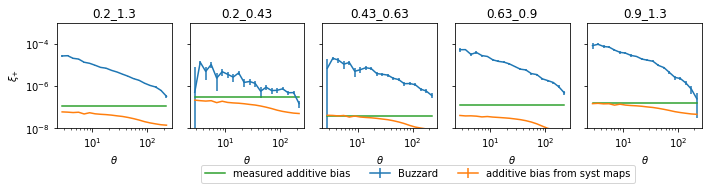

In [70]:
fig, ax = plt.subplots(1,5,sharex=False, sharey=True, figsize=(10,2.5))
for i,z_min in enumerate(z_min_arr):
    z_max = z_max_arr[i]
    binx = '{0}_{1}'.format(z_min,z_max)
    theta = dict_cc[binx]['0']['pairs']['theta']
    mean_ee = np.mean(dict_tot[binx]['e1'][dict_tot[binx]['info']['mask_sims']])**2+np.mean(dict_tot[binx]['e2'][dict_tot[binx]['info']['mask_sims']])**2
    mean_eq = np.mean(dict_tot[binx]['e2'][dict_tot[binx]['info']['mask_sims']])*np.mean(dict_tot[binx]['q2'][dict_tot[binx]['info']['mask_sims']])
    + np.mean(dict_tot[binx]['e1'][dict_tot[binx]['info']['mask_sims']])*np.mean(dict_tot[binx]['q1'][dict_tot[binx]['info']['mask_sims']])
    mean_qq = np.mean(dict_tot[binx]['q1'][dict_tot[binx]['info']['mask_sims']])**2+np.mean(dict_tot[binx]['q2'][dict_tot[binx]['info']['mask_sims']])**2
    mean_eqs = np.mean(dict_tot[binx]['e2'][dict_tot[binx]['info']['mask_sims']])*np.mean(q2s_map[dict_tot[binx]['info']['mask_sims']])
    + np.mean(dict_tot[binx]['e1'][dict_tot[binx]['info']['mask_sims']])*np.mean(q1s_map[dict_tot[binx]['info']['mask_sims']])
    mean_qq_stars = np.mean(q1s_map[dict_tot[binx]['info']['mask_sims']])**2+np.mean(q2s_map[dict_tot[binx]['info']['mask_sims']])**2


    jj = 'p'
    err = covariance_jck(dict_cc[binx]['Buzzard']['pairs']['corr_jck'+jj].T,1000,'jackknife')['err']
    ax[i].errorbar(theta*60,dict_cc[binx]['Buzzard'][ 'xi{0}1'.format(jj)],err,label='Buzzard')
    
    err_v = np.zeros((len(theta),10))
    for xx in range(10):
        err_v[:,xx] = dict_cc[binx][str(xx)][ 'xi{0}1'.format(jj)]
    #err = covariance_jck(dict_cc[binx]['0']['pairs']['corr_jck{0}'.format(jj)].T,1000,'jackknife')['err']
    err = covariance_jck(err_v,10,'jackknife')['err']
    
    #ax[i].errorbar(theta*60,dict_cc[binx]['0'][ 'xi{0}1'.format(jj)],err,label='additive bias from syst maps')
    ax[i].errorbar(theta*60,dict_cc[binx]['0'][ 'xi{0}1'.format(jj)],err*0.,label='additive bias from syst maps')
    
    #ax[0,i].errorbar(theta*60,theta*60*dict_cc[binx]['ac'][ 'xi{0}1'.format(jj)],theta*err*60,label='psf systematic')
    #ax[0,i].errorbar(theta*60,theta*60*dict_cc[binx]['stellar_ac'][ 'xi{0}1'.format(jj)],theta*err*60,label='psf_s systematic')
    #ax[0,i].plot(theta*60,theta*60*(mean_qq_stars),label='measured qq_s additive bias')
    ##ax[0,i].plot(theta*60,theta*60*(mean_qq),label='measured qq additive bias')
  

    ax[i].plot(theta*60,np.ones(len(theta))*(mean_ee),label='measured additive bias')
    '''
    jj = 'm'
    err = covariance_jck(dict_cc[binx]['Buzzard']['pairs']['corr_jck'+jj].T,1000,'jackknife')['err']
    ax[1,i].errorbar(theta*60,dict_cc[binx]['Buzzard'][ 'xi{0}1'.format(jj)],err,label='Buzzard')
    err_v = np.zeros((len(theta),10))
    for xx in range(10):
        err_v[:,xx] = dict_cc[binx][str(xx)][ 'xi{0}1'.format(jj)]
    #err = covariance_jck(dict_cc[binx]['0']['pairs']['corr_jck{0}'.format(jj)].T,1000,'jackknife')['err']
    err = covariance_jck(err_v,10,'jackknife')['err']
    
    ax[1,i].errorbar(theta*60,dict_cc[binx]['0'][ 'xi{0}1'.format(jj)],err,label='additive bias from syst maps')
    '''
    plt.yscale("log")
    #ax[1,i].set_xscale("log")
    ax[i].set_xscale("log")
    ax[i].set_ylim([0.00000001,0.001])
   # ax[1,0].set_ylabel(r"$\theta\xi_{-}$")
    ax[0].set_ylabel(r"$\theta\xi_{+}$")
    #ax[1,0].set_ylabel(r"$\xi_{-}$")
    ax[0].set_ylabel(r"$\xi_{+}$")

    ax[i].set_xlabel(r"$\theta$")
    ax[i].set_title(binx)
    ax[2].legend(loc="upper left", bbox_to_anchor=(-1.1,-0.3),ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.5)
plt.savefig("additive_bias_sys_maps.pdf")

In [68]:
1

1

# problematic correlations

In [173]:
#list of problematic bins:
for ii,z_min in enumerate(z_min_arr):
    # *********************************
    z_max = z_max_arr[ii]
    binx = '{0}_{1}'.format(z_min,z_max)
    for key in dict_systematics_tot_BPZ[binx]['bpz_zmc']['_w0'].keys():
     if (key != "q1")  and (key != "q2")  and (key != "t1")  and (key != "t2") and (key != "t2_stars") and (key != "t1_stars") and (key != "q2_stars") and (key != "q1_stars"):
        b= dict_systematics_tot_BPZ[binx]['bpz_zmc']['_w0'][key]['b_arr'][0]
        b_err = dict_systematics_tot_BPZ[binx]['bpz_zmc']['_w0'][key]['b_err']#
       
        if np.sqrt((b/b_err)**2.)>2.5:
            print key,binx#,b/b_err,b,b_err
print " "
print " "
print " "
for ii,z_min in enumerate(z_min_arr):
    # *********************************
    z_max = z_max_arr[ii]
    binx = '{0}_{1}'.format(z_min,z_max)
    for key in dict_systematics_tot_BPZ[binx]['bpz_zmc']['_w0'].keys():
     if (key != "q1")  and (key != "q2")  and (key != "t1")  and (key != "t2") and (key != "t2_stars") and (key != "t1_stars") and (key != "q2_stars") and (key != "q1_stars"):
        b= dict_systematics_tot_BPZ[binx]['bpz_zmc']['_w0'][key]['b_arr'][0]
        b_err = dict_systematics_tot_BPZ[binx]['bpz_zmc']['_w0'][key]['b_err']#
       
        if np.sqrt((b/b_err)**2.)>2.5:
            print "bpz_zmc",key,binx,b/b_err,b,b_err
          
            
            
            y = dict_tot[binx]['bpz_zmc'][dict_tot[binx]['info']['mask_sims']]
            x = systematic_maps_binx[binx][key]['map'][dict_tot[binx]['info']['mask_sims']]
     
            lenp=20
            minx=min(x)
            maxx=max(x)
            if key =="seeing_i":
                minx = 1
                maxx = 1.4
            if key =="exp_time_i":
                minx = 200
                maxx = 500
            if key =="PSF_E2":
                minx = -0.02
                maxx = 0.02
                
            if key =="PSF_E1":
                minx = -0.02
                maxx = 0.02
            if key =="brightness_i":
                minx = 5
                maxx = 10
            if key =="airmass_i":
                minx = 1.
                maxx = 1.4
            if key =="kE":
                minx = -0.2
                maxx = 0.2
            nbins = np.linspace(minx,maxx,lenp+1)
            mn = []
            mne = []
            for i in range(lenp):

                maska = (x>nbins[i])&(x<nbins[i+1])
                n, _ = np.histogram(x[maska], bins=nbins)
                mn.append(np.mean(y[maska]))
                mne.append(np.std(y)/np.sqrt(len(y[maska])))

            fig, ax = plt.subplots(1,2,figsize=(8,3))
            xx = 0.5*(nbins[1:]+nbins[:-1])
            plt.title("{0} , sigma: {2:2.2f} [{1}]".format(key,binx,b/b_err))
            ax[0].set_xlabel("{0}".format(key))
            ax[1].set_xlabel("{0}".format(key))
            ax[0].set_ylabel(r"$\Delta <z>")
            ax[0].errorbar(xx,mn-np.mean(y),mne,fmt = 'o')
            beta = dict_systematics_tot_BPZ[binx]['bpz_zmc']['_w0'][key]['b_arr'][0]
        
            ax[0].plot(xx,beta*(xx-np.mean(x)))


            
            minx=min(x)
            maxx=max(x)
            nbins = np.linspace(minx,maxx,lenp+1)
            mn = []
            mne = []
            for i in range(lenp):

                maska = (x>nbins[i])&(x<nbins[i+1])
                n, _ = np.histogram(x[maska], bins=nbins)
                mn.append(np.mean(y[maska]))
                mne.append(np.std(y)/np.sqrt(len(y[maska])))

            xx = 0.5*(nbins[1:]+nbins[:-1])
            ax[1].errorbar(xx,mn-np.mean(y),mne,fmt = 'o')
            beta = dict_systematics_tot_BPZ[binx]['bpz_zmc']['_w0'][key]['b_arr'][0]
        
            ax[1].plot(xx,beta*(xx-np.mean(x)))
            plt.tight_layout()
            plt.show()

            
for ii,z_min in enumerate(z_min_arr):
    # *********************************
    z_max = z_max_arr[ii]
    binx = '{0}_{1}'.format(z_min,z_max)
    for key in dict_systematics_tot_E[binx]['E2']['_w0'].keys():
     if (key != "E2") and (key != "q1")  and (key != "q2")  and (key != "t1")  and (key != "t2") and (key != "t2_stars") and (key != "t1_stars") and (key != "q2_stars") and (key != "q1_stars"):
        b= dict_systematics_tot_E[binx]['E2']['_w0'][key]['b_arr'][0]
        b_err = dict_systematics_tot_E[binx]['E2']['_w0'][key]['b_err']#
       
        if np.sqrt((b/b_err)**2.)>2.5:
            print "E2",key,binx,b/b_err,b,b_err
          
            
            
            y = dict_tot[binx]['e2'][dict_tot[binx]['info']['mask_sims']]
            x = systematic_maps_binx[binx][key]['map'][dict_tot[binx]['info']['mask_sims']]
     
            lenp=20
            minx=min(x)
            maxx=max(x)
            if key =="seeing_i":
                minx = 1
                maxx = 1.4
            if key =="exp_time_i":
                minx = 200
                maxx = 500
            if key =="PSF_E2":
                minx = -0.02
                maxx = 0.02
                
            if key =="PSF_E1":
                minx = -0.02
                maxx = 0.02
            if key =="brightness_i":
                minx = 5
                maxx = 10
            if key =="airmass_i":
                minx = 0.8
                maxx = 1.
            if key =="kE":
                minx = -0.02
                maxx = 0.02
            nbins = np.linspace(minx,maxx,lenp+1)
            mn = []
            mne = []
            for i in range(lenp):

                maska = (x>nbins[i])&(x<nbins[i+1])
                n, _ = np.histogram(x[maska], bins=nbins)
                mn.append(np.mean(y[maska]))
                mne.append(np.std(y)/np.sqrt(len(y[maska])))

            fig, ax = plt.subplots(1,2,figsize=(8,3))
            xx = 0.5*(nbins[1:]+nbins[:-1])
            plt.title("{0} , sigma: {2:2.2f} [{1}]".format(key,binx,b/b_err))
            ax[0].errorbar(xx,mn-np.mean(y),mne,fmt = 'o')
            beta = dict_systematics_tot_E[binx]['E2']['_w0'][key]['b_arr'][0]
            b_err = dict_systematics_tot_E[binx]['E2']['_w0'][key]['b_err']
            ax[0].plot(xx,beta*(xx-np.mean(x)))
            

            ax[0].fill_between(xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5)


            
            minx=min(x)
            maxx=max(x)
            nbins = np.linspace(minx,maxx,lenp+1)
            mn = []
            mne = []
            for i in range(lenp):

                maska = (x>nbins[i])&(x<nbins[i+1])
                n, _ = np.histogram(x[maska], bins=nbins)
                mn.append(np.mean(y[maska]))
                mne.append(np.std(y)/np.sqrt(len(y[maska])))

            xx = 0.5*(nbins[1:]+nbins[:-1])
            ax[1].errorbar(xx,mn-np.mean(y),mne,fmt = 'o')
            beta = dict_systematics_tot_E[binx]['E2']['_w0'][key]['b_arr'][0]
            ax[0].set_xlabel("{0}".format(key))
            ax[1].set_xlabel("{0}".format(key))
            ax[0].set_ylabel(r"$\<E2>")
            ax[1].plot(xx,beta*(xx-np.mean(x)))
            ax[1].fill_between(xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5)

            plt.tight_layout()
            plt.show()
            
    for key in dict_systematics_tot_E[binx]['E1']['_w0'].keys():
     if (key != "E1") and (key != "q1")  and (key != "q2")  and (key != "t1")  and (key != "t2") and (key != "t2_stars") and (key != "t1_stars") and (key != "q2_stars") and (key != "q1_stars"):
        b= dict_systematics_tot_E[binx]['E1']['_w0'][key]['b_arr'][0]
        b_err = dict_systematics_tot_E[binx]['E1']['_w0'][key]['b_err']#
        if np.sqrt((b/b_err)**2.)>2.5:
            print "E1",key,binx,b/b_err,b,b_err
            
            
            y = dict_tot[binx]['e1'][dict_tot[binx]['info']['mask_sims']]
            x = systematic_maps_binx[binx][key]['map'][dict_tot[binx]['info']['mask_sims']]
     
            lenp=20
            if key =="seeing_i":
                minx = 1
                maxx = 1.4
            if key =="exp_time_i":
                minx = 200
                maxx = 500
            nbins = np.linspace(minx,maxx,lenp+1)
            mn = []
            mne = []
            for i in range(lenp):

                maska = (x>nbins[i])&(x<nbins[i+1])
                n, _ = np.histogram(x[maska], bins=nbins)
                mn.append(np.mean(y[maska]))
                mne.append(np.std(y)/np.sqrt(len(y[maska])))

            fig, ax = plt.subplots(1,2,figsize=(8,3))
            xx = 0.5*(nbins[1:]+nbins[:-1])
            plt.title("{0} , sigma: {2:2.2f} [{1}]".format(key,binx,b/b_err))
            ax[0].errorbar(xx,mn-np.mean(y),mne,fmt = 'o')
            beta = dict_systematics_tot_E[binx]['E1']['_w0'][key]['b_arr'][0]
            b_err = dict_systematics_tot_E[binx]['E1']['_w0'][key]['b_err']
            ax[0].plot(xx,beta*(xx-np.mean(x)))
            ax[0].fill_between(xx,(beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5)

            
            
            
            ax[0].set_xlabel("{0}".format(key))
            ax[1].set_xlabel("{0}".format(key))
            ax[0].set_ylabel(r"$\<E1>")
            
            
            minx=min(x)
            maxx=max(x)
            nbins = np.linspace(minx,maxx,lenp+1)
            mn = []
            mne = []
            for i in range(lenp):

                maska = (x>nbins[i])&(x<nbins[i+1])
                n, _ = np.histogram(x[maska], bins=nbins)
                mn.append(np.mean(y[maska]))
                mne.append(np.std(y)/np.sqrt(len(y[maska])))

           
            xx = 0.5*(nbins[1:]+nbins[:-1])
            ax[1].errorbar(xx,mn-np.mean(y),mne,fmt = 'o')
            beta = dict_systematics_tot_E[binx]['E1']['_w0'][key]['b_arr'][0]
        
            ax[1].plot(xx,beta*(xx-np.mean(x)))
            ax[1].fill_between(xx, (beta+b_err)*(xx-np.mean(x)),(beta-b_err)*(xx-np.mean(x)),alpha = 0.5)

            plt.tight_layout()
            plt.show()
            
            

12.566370614359172